In [1]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
library(dagitty)

# Spurious associations example

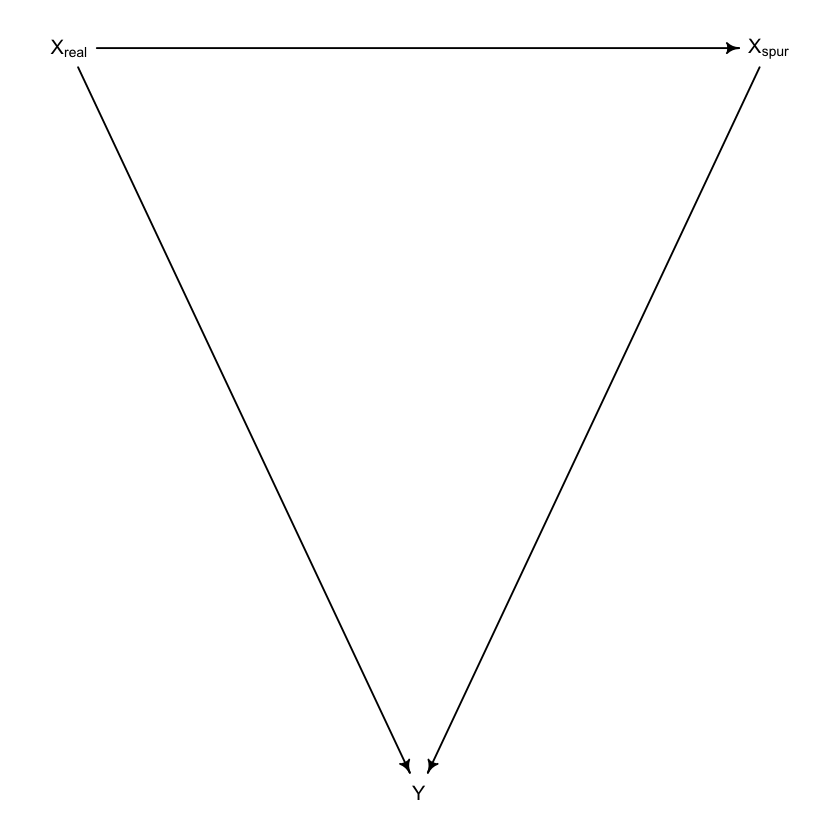

In [3]:
library(dagitty)
dag <- dagitty( "dag {
X_real -> Y 
X_real -> X_spur 
X_spur -> Y
}")
coordinates(dag) <- list( x=c(X_real=0,Y=1,X_spur=2) , y=c(X_real=0,Y=1,X_spur=0) ) 
drawdag( dag )

In [4]:
N <- 100
x_real <- rnorm( N )
x_spur <- rnorm( N , x_real )
y <- rnorm( N , x_real )
d <- data.frame(y,x_real,x_spur)

## Using only real variable as predictor

In [5]:
m_real <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_real * x_real ,
    a ~ dnorm( 0 , 0.2 ),
    b_real ~ dnorm( 0 , 0.5 ) , 
    sigma ~ dexp( 1 )
) , data = d )

In [6]:
x_seq <- seq( from=-3 , to=3 , length.out=50 )
mu <- link(m_real, data = list(x_real=x_seq))

In [7]:
head(mu)

-2.354401,-2.260262,-2.166124,-2.071985,-1.977847,-1.883708,-1.789570,-1.695431,-1.601293,-1.507154,⋯,1.411138,1.505277,1.599415,1.693554,1.787692,1.881831,1.975969,2.070108,2.164246,2.258385
-3.057241,-2.935331,-2.813420,-2.691510,-2.569599,-2.447688,-2.325778,-2.203867,-2.081956,-1.960046,⋯,1.819183,1.941094,2.063005,2.184915,2.306826,2.428737,2.550647,2.672558,2.794468,2.916379
-2.011451,-1.930196,-1.848940,-1.767684,-1.686428,-1.605173,-1.523917,-1.442661,-1.361406,-1.280150,⋯,1.238778,1.320034,1.401289,1.482545,1.563801,1.645057,1.726312,1.807568,1.888824,1.970080
-3.074312,-2.945135,-2.815958,-2.686781,-2.557605,-2.428428,-2.299251,-2.170074,-2.040897,-1.911721,⋯,2.092760,2.221937,2.351114,2.480291,2.609468,2.738645,2.867821,2.996998,3.126175,3.255352
-2.725554,-2.617908,-2.510261,-2.402615,-2.294968,-2.187322,-2.079676,-1.972029,-1.864383,-1.756737,⋯,1.580301,1.687947,1.795594,1.903240,2.010886,2.118533,2.226179,2.333826,2.441472,2.549118
-2.210189,-2.122502,-2.034815,-1.947129,-1.859442,-1.771755,-1.684068,-1.596382,-1.508695,-1.421008,⋯,1.297281,1.384968,1.472655,1.560341,1.648028,1.735715,1.823402,1.911088,1.998775,2.086462


In [8]:
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

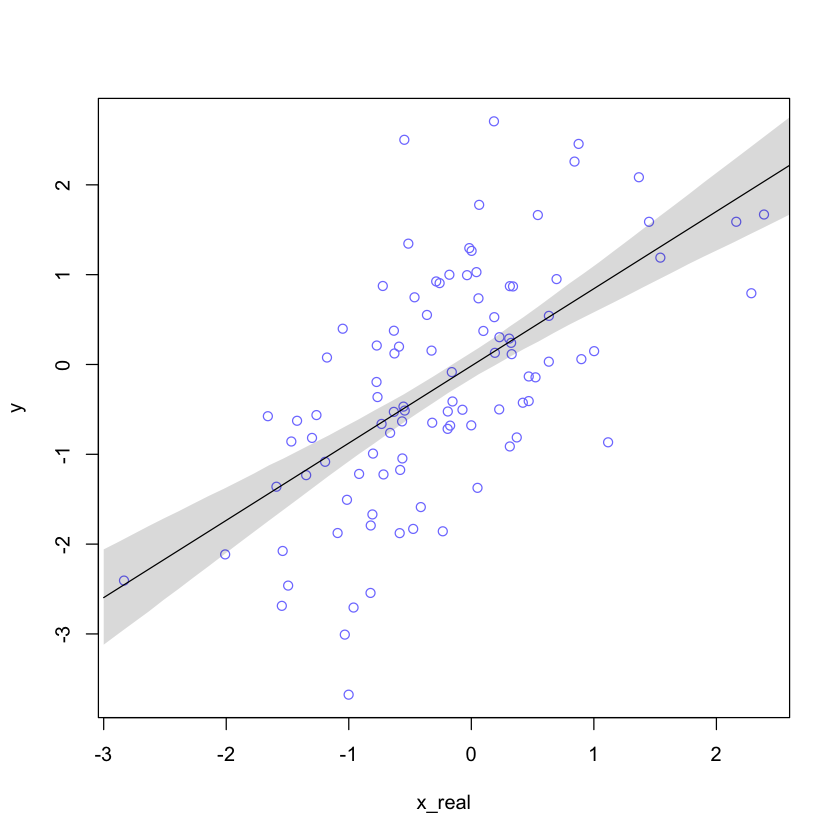

In [9]:
plot(y~x_real, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

Strong relationship between predictor and output

In [10]:
precis(m_real)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.01886772,0.09269481,-0.1670119,0.1292765
b_real,0.85760654,0.10995982,0.6818695,1.0333436
sigma,1.01004943,0.07098836,0.8965963,1.1235025


## Using only spurious variable as predictor

In [11]:
m_spur <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_spur * x_spur ,
    a ~ dnorm( 0 , 0.2 ),
    b_spur ~ dnorm( 0 , 0.5 ) , 
    sigma ~ dexp( 1 )
) , data = d )

In [12]:
x_seq <- seq( from=-4 , to=4 , length.out=50 )
mu <- link(m_spur, data = list(x_spur=x_seq))

In [13]:
head(mu)

-1.415739,-1.357438,-1.299136,-1.240835,-1.182533,-1.1242315,-1.0659300,-1.0076285,-0.9493269,-0.8910254,⋯,0.9163223,0.9746239,1.0329254,1.0912269,1.1495285,1.2078300,1.2661315,1.3244331,1.3827346,1.4410362
-1.176756,-1.133941,-1.091126,-1.048311,-1.005496,-0.9626806,-0.9198655,-0.8770503,-0.8342352,-0.7914200,⋯,0.5358497,0.5786649,0.6214800,0.6642952,0.7071103,0.7499255,0.7927406,0.8355558,0.8783709,0.9211861
-1.603071,-1.541888,-1.480704,-1.419521,-1.358338,-1.2971547,-1.2359714,-1.1747882,-1.1136049,-1.0524217,⋯,0.8442587,0.9054420,0.9666252,1.0278085,1.0889917,1.1501749,1.2113582,1.2725414,1.3337247,1.3949079
-1.615394,-1.548836,-1.482279,-1.415722,-1.349165,-1.2826078,-1.2160507,-1.1494935,-1.0829364,-1.0163792,⋯,1.0468925,1.1134497,1.1800068,1.2465640,1.3131211,1.3796783,1.4462354,1.5127926,1.5793497,1.6459069
-1.357542,-1.301974,-1.246407,-1.190839,-1.135272,-1.0797042,-1.0241366,-0.9685691,-0.9130016,-0.8574341,⋯,0.8651592,0.9207267,0.9762943,1.0318618,1.0874293,1.1429968,1.1985644,1.2541319,1.3096994,1.3652669
-1.248376,-1.199699,-1.151022,-1.102345,-1.053669,-1.0049916,-0.9563147,-0.9076378,-0.8589608,-0.8102839,⋯,0.6987009,0.7473778,0.7960548,0.8447317,0.8934086,0.9420856,0.9907625,1.0394394,1.0881164,1.1367933


In [14]:
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

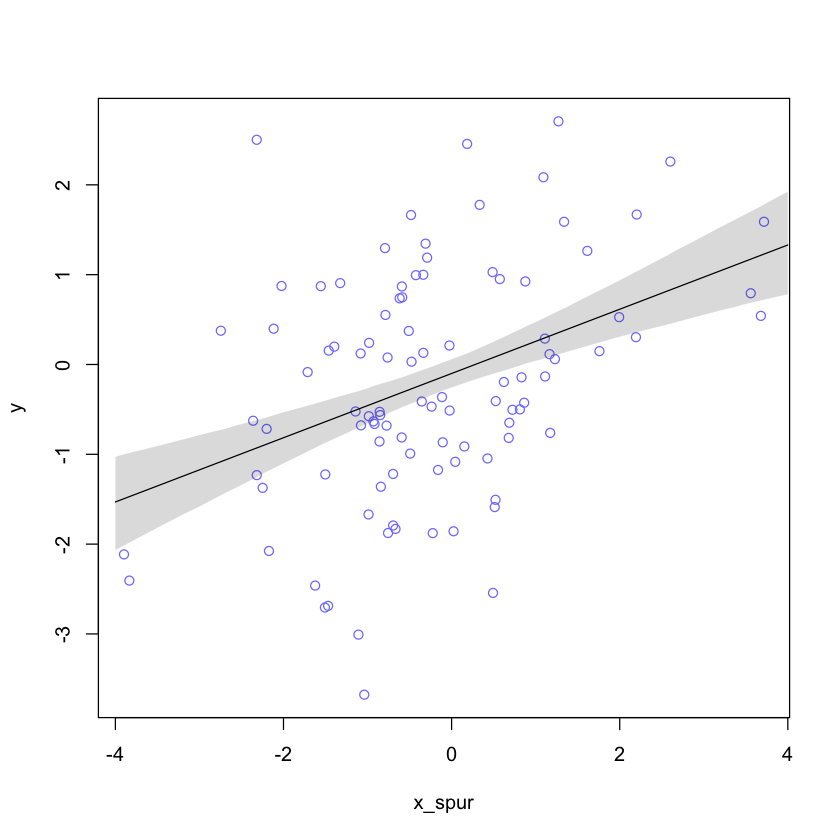

In [15]:
plot(y~x_spur, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

Weaker relationship (but still present).

In [16]:
precis(m_spur)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1065341,0.10308830,-0.2712891,0.05822092
b_spur,0.3564170,0.08293655,0.2238683,0.48896559
sigma,1.1830540,0.08298668,1.0504253,1.31568278


## Using both predictors

In [17]:
m_all <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_real * x_real + b_spur * x_spur ,
    a ~ dnorm( 0 , 0.2 ),
    b_real ~ dnorm( 0 , 0.5 ) ,
    b_spur ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [18]:
x_seq <- seq( from=-4 , to=4 , length.out=50 )
mu <- link(m_all, data = list(x_real=x_seq, x_spur=x_seq))

In [19]:
head(mu)

-2.681327,-2.575109,-2.468892,-2.362674,-2.256456,-2.150239,-2.044021,-1.937803,-1.831585,-1.725368,⋯,1.567381,1.673599,1.779817,1.886035,1.992252,2.098470,2.204688,2.310905,2.417123,2.523341
-3.578829,-3.431272,-3.283716,-3.136159,-2.988602,-2.841046,-2.693489,-2.545932,-2.398376,-2.250819,⋯,2.323438,2.470995,2.618551,2.766108,2.913665,3.061221,3.208778,3.356335,3.503892,3.651448
-3.812503,-3.655732,-3.498961,-3.342190,-3.185418,-3.028647,-2.871876,-2.715104,-2.558333,-2.401562,⋯,2.458348,2.615119,2.771891,2.928662,3.085433,3.242204,3.398976,3.555747,3.712518,3.869290
-3.935557,-3.774640,-3.613724,-3.452807,-3.291891,-3.130974,-2.970057,-2.809141,-2.648224,-2.487308,⋯,2.501106,2.662023,2.822940,2.983856,3.144773,3.305689,3.466606,3.627522,3.788439,3.949356
-3.003533,-2.881188,-2.758844,-2.636500,-2.514156,-2.391811,-2.269467,-2.147123,-2.024779,-1.902434,⋯,1.890238,2.012582,2.134927,2.257271,2.379615,2.501959,2.624304,2.746648,2.868992,2.991337
-3.645391,-3.496186,-3.346981,-3.197777,-3.048572,-2.899367,-2.750162,-2.600958,-2.451753,-2.302548,⋯,2.322801,2.472005,2.621210,2.770415,2.919620,3.068825,3.218029,3.367234,3.516439,3.665644


In [20]:
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

Not any advantage in knowing the variable $x_{spur}$ when you know the variable $x_{real}$.

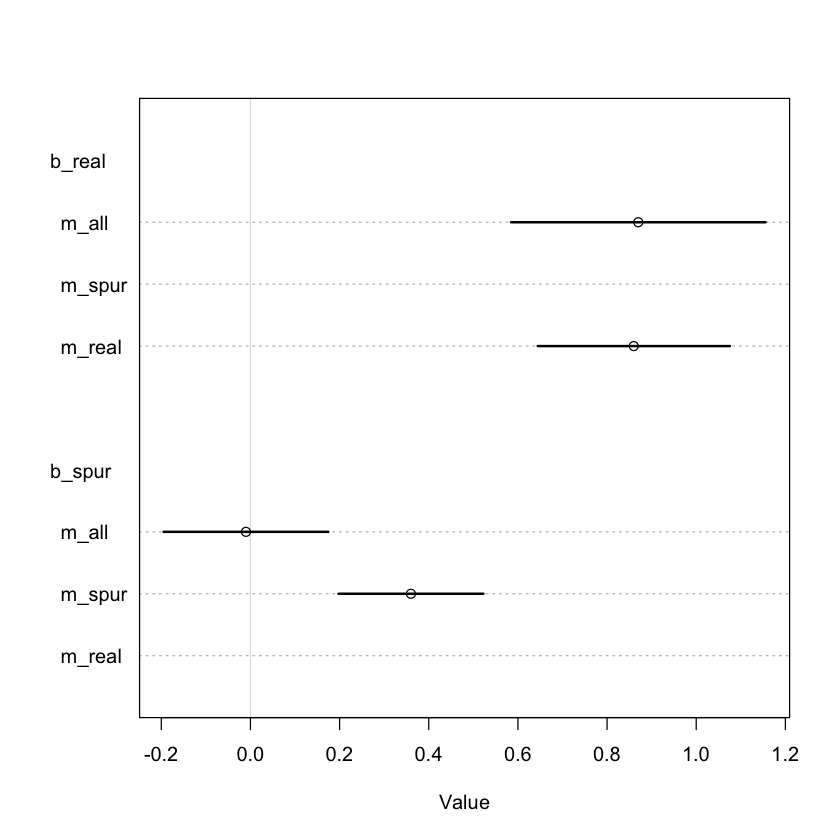

In [21]:
plot( coeftab(m_real,m_spur,m_all), par=c("b_real","b_spur") )

In [22]:
precis(m_all)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.01901215,0.09266074,-0.1671019,0.1290776
b_real,0.86809776,0.14565423,0.6353142,1.1008813
b_spur,-0.01028468,0.09422062,-0.1608674,0.1402981
sigma,1.00955943,0.07102800,0.8960430,1.1230759


## residuals of posterior

Predicting spurious variable with real variable

In [23]:
m_sp_res <- quap( alist(
    x_spur ~ dnorm( mu , sigma ) , 
    mu <- a + b_real * x_real,
    a ~ dnorm( 0 , 0.2 ),
    b_real ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [24]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_sp_res, data = list(x_real=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )
mu_resid <- d$x_spur - mu_mean

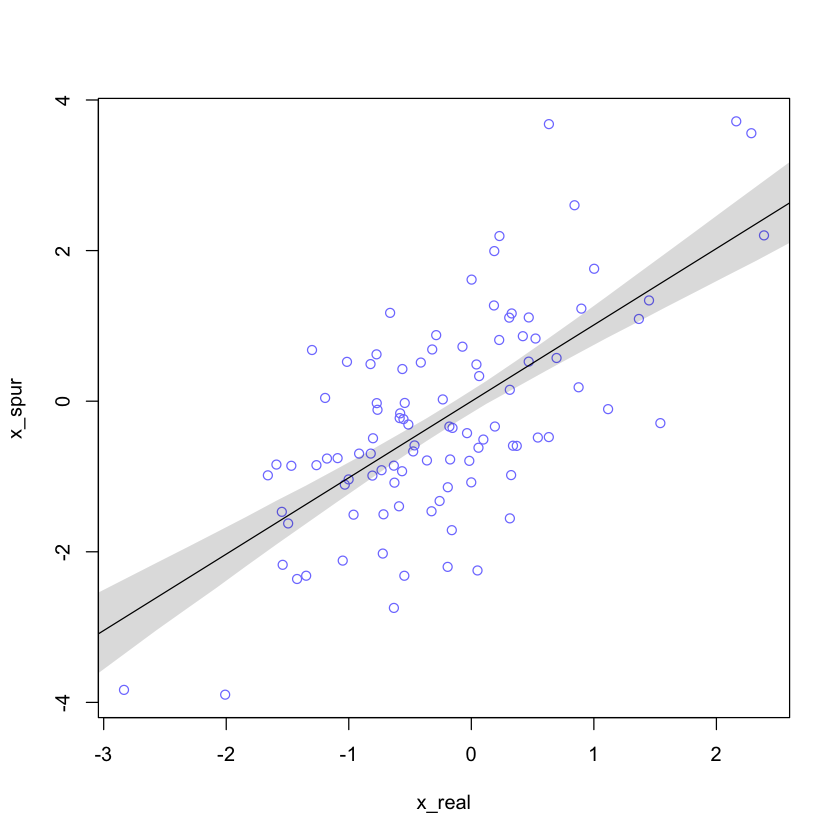

In [25]:
#plot(x_spur~x_real, data=d, col=rangi2)
plot(x_spur~x_real, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

predicting $y$ with residuals

In [26]:
d$x_spur_res = mu_resid

In [27]:
m_sp_res <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_spur_res * x_spur_res,
    a ~ dnorm( 0 , 0.2 ),
    b_spur_res ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [28]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_sp_res, data = list(x_spur_res=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

residuals <0 and >0 have little difference in what is the outcome of $y$ on average. This means that once we remove the effect of $x_real$ on the spurious variable, what is left is of little information for our prediction

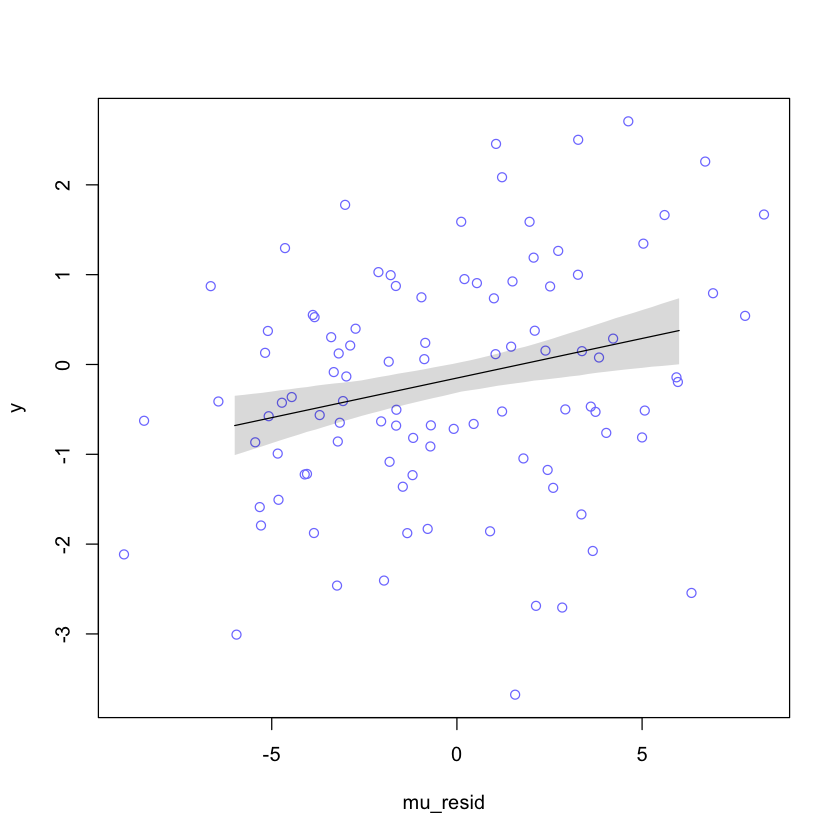

In [29]:
plot(y~mu_resid, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

Conversely, predicting the real predictor with the spurious variable will have little effect on the residuals

In [80]:
m_re_res <- quap( alist(
    x_real ~ dnorm( mu , sigma ) , 
    mu <- a + b_spur * x_spur,
    a ~ dnorm( 0 , 0.2 ),
    b_spur ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [81]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_re_res, data = list(x_spur=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )
mu_resid <- d$x_real - mu_mean

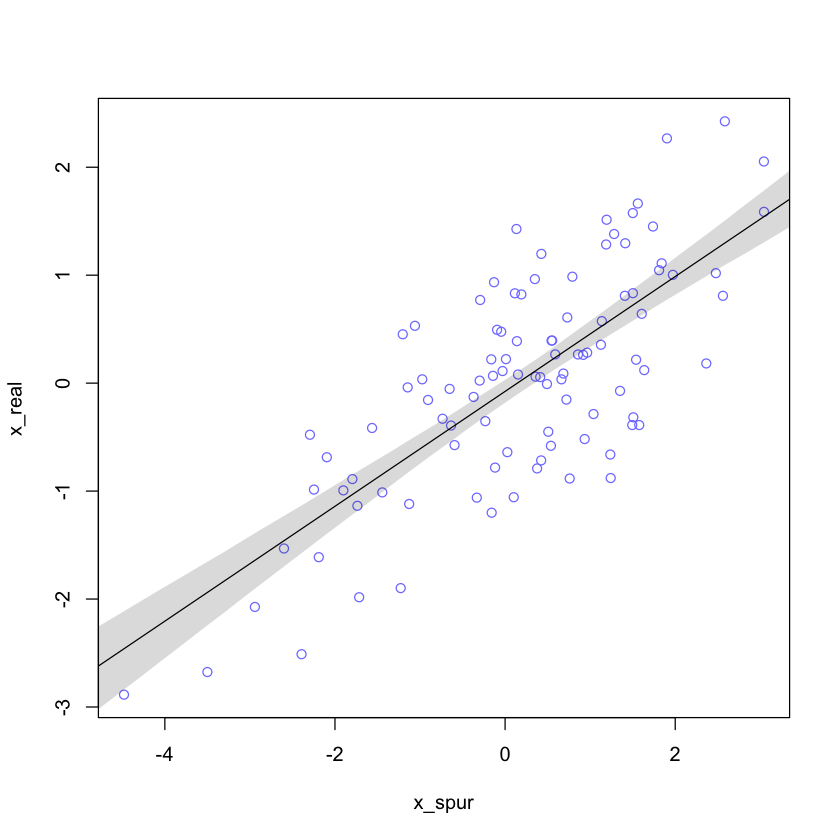

In [82]:
#plot(x_spur~x_real, data=d, col=rangi2)
plot(x_real~x_spur, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

In [83]:
d$x_real_res = mu_resid

In [90]:
m_re_res <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_real_res * x_real_res,
    a ~ dnorm( 0 , 0.2 ),
    b_real_res ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [91]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_re_res, data = list(x_real_res=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

residuals <0 and >0 have little difference in what is the outcome of $y$ on average. This means that once we remove the effect of $x_real$ on the spurious variable, what is left is of little information for our prediction

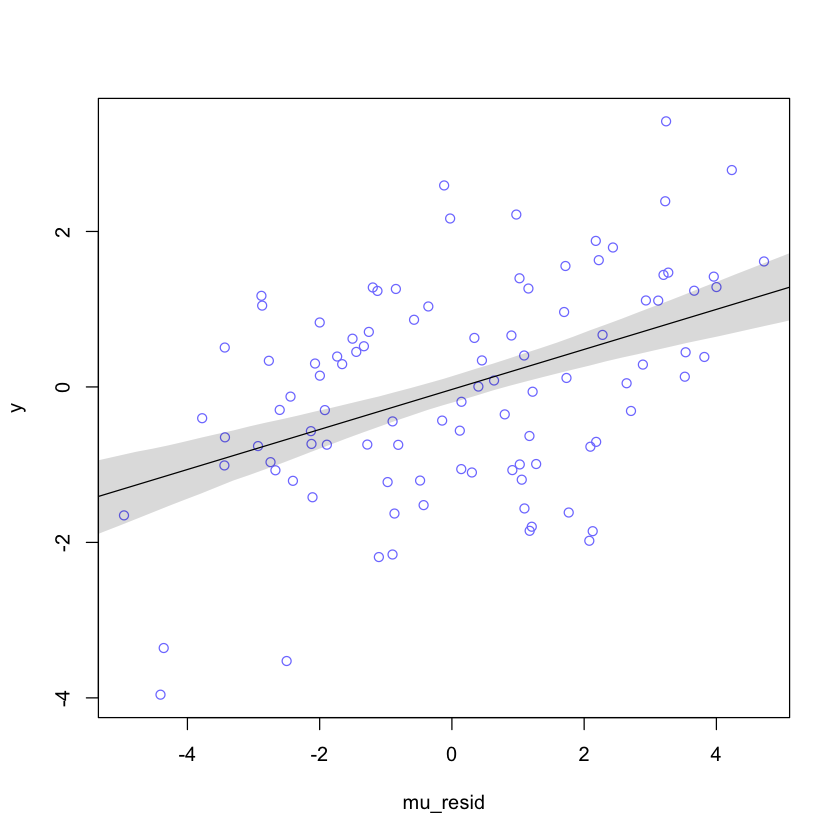

In [92]:
plot(y~mu_resid, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

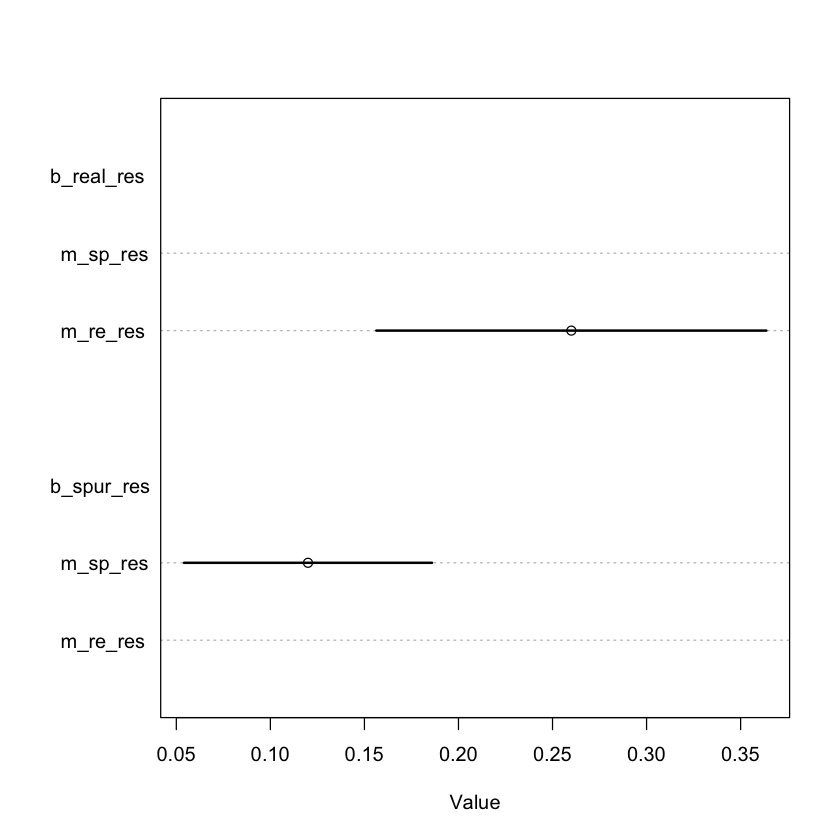

In [93]:
plot( coeftab(m_re_res,m_sp_res), par=c("b_real_res","b_spur_res") )

# Chapters 6 - 7


## Haunted DAG and Causal Terror
The importance of causal models and of not throwing any predictor into a multiple regression

## Ulisses' Compass
Regularization and predictive accuracy

## Selection-distortion effect

conditioning predictors enable the information on one of them to obtain information on the other predictors


<img src="./img/selectiondistortion.png" alt="Drawing" style="width: 500px;"/>

Three issues arising in multiple regressions. You can find your way to a valid inference **but not a valid model**.

- Multicollinearity
- Post treatment bias
- Collider bias

## Multicollinearity

Very correlated predictors give you **good prediction** but make the final model **not interpretable/understandable**

Do we want to **just predict** or also to **interpret our posteriors** and the dynamics behind the data?

### The leg-height example

using left and right legs' length to predict height

In [165]:
N <- 100 # number of individuals
set.seed(909)
height <- rnorm(N,10,2) # sim total height of each
leg_prop <- runif(N,0.4,0.5) # leg as proportion of height
leg_left <- leg_prop*height + rnorm( N , 0 , 0.2 ) # sim left leg as proportion + error
leg_right <- leg_prop*height + rnorm( N , 0 , 0.02 )
d <- data.frame(height,leg_left,leg_right) # combine into data frame

If $H \sim \cal N(\mu, \sigma)$  and $\mu = \alpha + \beta_r L_{r} + \beta_\ell L_{\ell}$ then the slope should be around 2 = 10/4.5, but

In [24]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 200) #resize plots

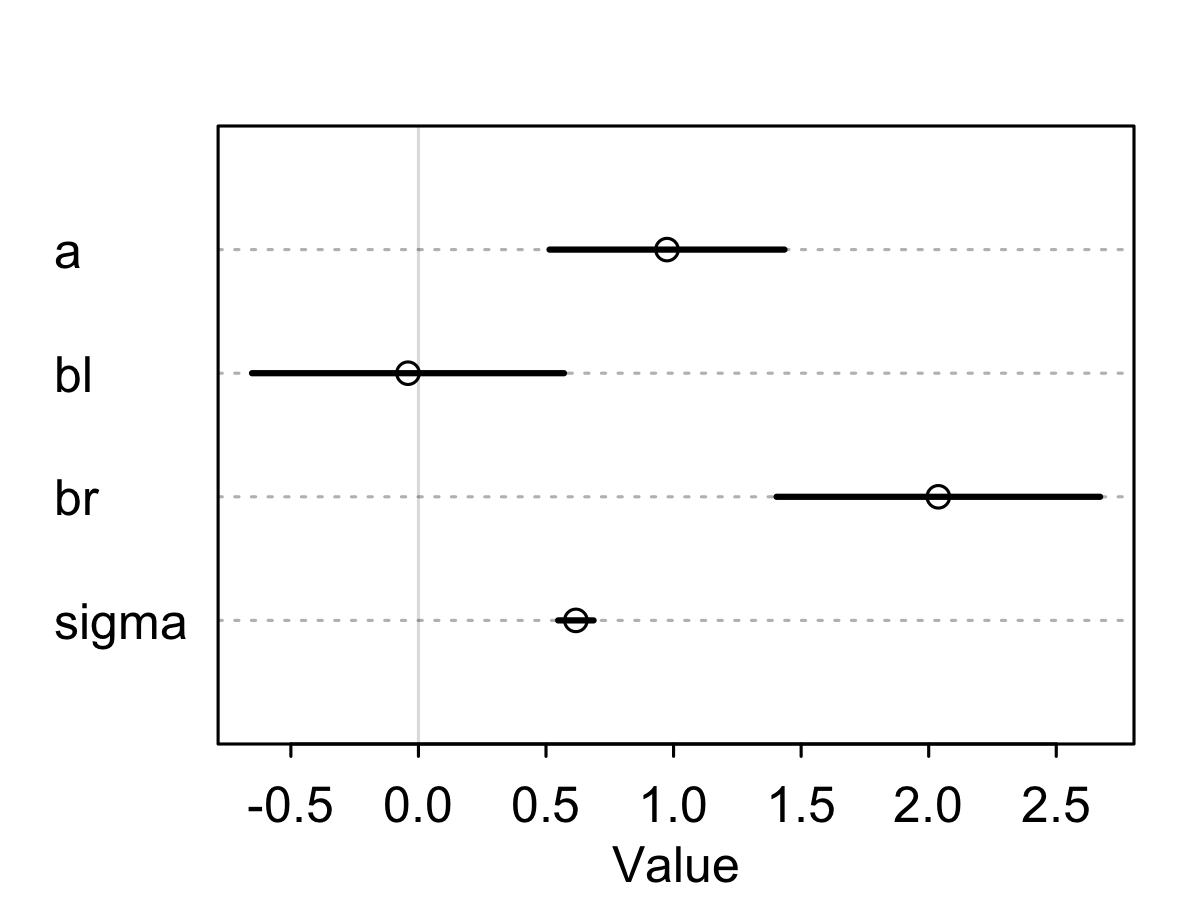

In [166]:
m6.1 <- quap( alist(  height ~ dnorm( mu , sigma ) ,
                      mu <- a + bl*leg_left + br*leg_right , 
                      a ~ dnorm( 10 , 100 ) , bl ~ dnorm( 2 , 10 ), 
                      br ~ dnorm( 2 , 10 ) , sigma ~ dexp( 1 ) ),
                      data=d ) 
plot(precis(m6.1))

**What information does knowing the right leg add to knowing the left leng add to my model?**

In [28]:
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 200) #resize plots

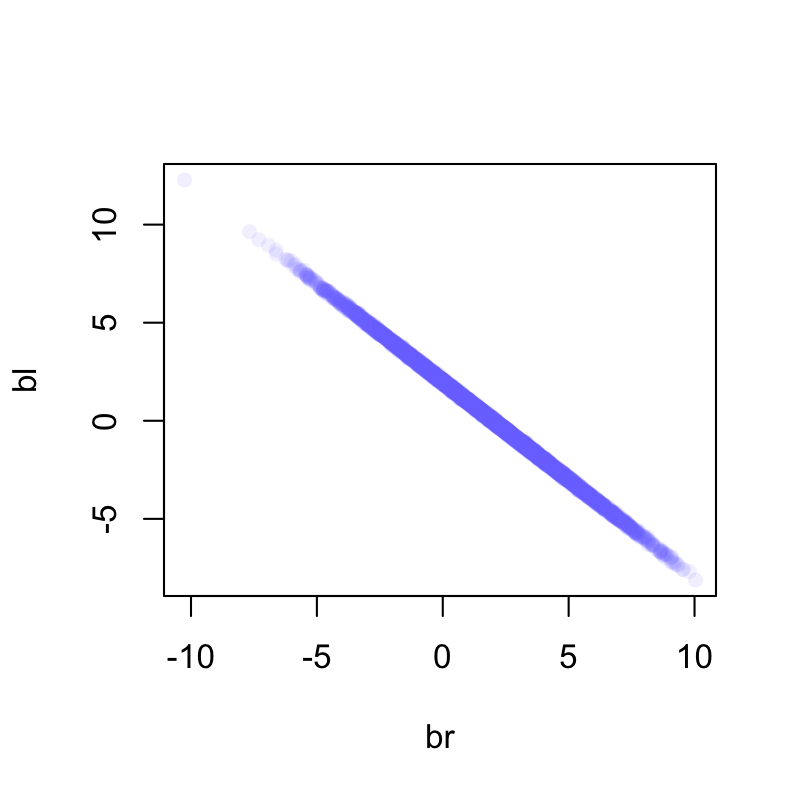

In [30]:
post <- extract.samples(m6.1)
plot( bl ~ br , post , col=col.alpha(rangi2,0.1) , pch=16 )

The joint posterior tells you that for any value of $\beta_r$, you have a $\beta_\ell$ so that $\beta_r+\beta_\ell=2$

Also, predicting $\beta_\ell$ with $\beta_r$ leaves you no residuals to model the height.

You have **infinite combinations** of the two slopes that can give you correct predictions, though making the model of little interpretability.

The model is not wrong, but **cannot answer** the question you ask (importance of one leg knowing the other one)

Important: removal of highly correlated variables is not the way to go. **Understanding the causal model** is what you need to do.

Other variables might govern your model.

<img src="./img/milkExample_dag.png" alt="Drawing" style="width: 500px;"/>

# Post-treatment bias

using predictors variables that are the effect of other predictors

### Simulating anti-fungal treatment

In [33]:
set.seed(71)
# number of plants 
N <- 100
# simulate initial heights 
h0 <- rnorm(N,10,2)
# assign treatments and simulate fungus and growth 
treatment <- rep( 0:1 , each=N/2 )
fungus <- rbinom( N , size=1 , prob=0.5 - treatment*0.4 ) 
h1 <- h0 + rnorm(N, 5 - 3*fungus)
# compose a clean data frame
d <- data.frame( h0=h0 , h1=h1 , treatment=treatment , fungus=fungus ) 
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
h0,9.95978,2.1011623,6.570328,13.07874,▁▂▂▂▇▃▂▃▁▁▁▁
h1,14.39920,2.6880870,10.618002,17.93369,▁▁▃▇▇▇▁▁
treatment,0.50000,0.5025189,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇
fungus,0.23000,0.4229526,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▂


### Modeling 
without the post-treatment fungus

In [37]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 200) #resize plots

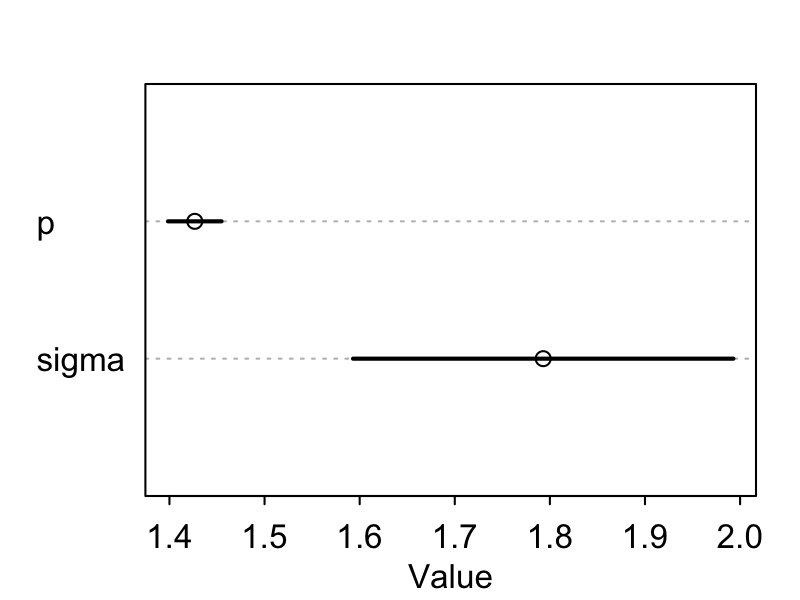

In [38]:
m6.6 <- quap( alist(
        h1 ~ dnorm( mu , sigma ), 
        mu <- h0*p,
        p ~ dlnorm( 0 , 0.25 ), sigma ~ dexp( 1 )), 
        data=d ) 
plot(precis(m6.6))

### Modeling 
with the post-treatment fungus

In [39]:
m6.7 <- quap( alist(
            h1 ~ dnorm( mu , sigma ),
            mu <- h0 * p,
            p <- a + bt*treatment + bf*fungus, 
            a ~ dlnorm( 0 , 0.2 ) , bt ~ dnorm( 0 , 0.5 ), bf ~ dnorm( 0 , 0.5 ),
            sigma ~ dexp( 1 )), 
            data=d ) 

In [40]:
precis(m6.7)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.481390987,0.02451066,1.44221821,1.52056376
bt,0.002412496,0.02986961,-0.04532491,0.05014991
bf,-0.266718012,0.03654768,-0.32512826,-0.20830777
sigma,1.408795661,0.09862040,1.25118122,1.56641010


Once we know that a fungus is present, then knowing that we have done a treatment is not of much importance. 

This because treatment and height are independent conditionally on observing fungi.

In [47]:
options(repr.plot.width=4, repr.plot.height=1, repr.plot.res = 200) #resize plots

library(dagitty)
plant_dag <- dagitty( "dag {
H_0 -> H_1 F -> H_1 T -> F
}")
coordinates( plant_dag ) <- list( x=c(H_0=0,T=2,F=1.5,H_1=1) , y=c(H_0=0,T=0,F=0,H_1=0) )

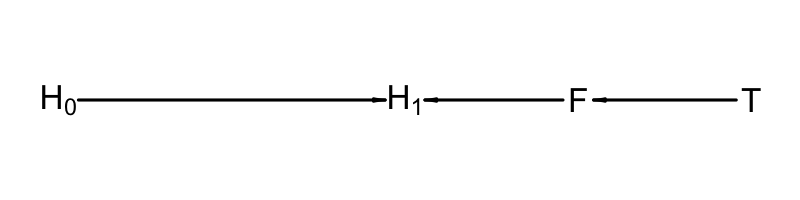

In [48]:
drawdag( plant_dag )

Using multiple models is useful to **understand causal relationships**, not just because we can select one.

# Collider bias

when selection happens in statistical phenomena

In the newsworthy/reliable model ($T \rightarrow S \leftarrow N$): knowing papers are selected tells you something about reliability once you know newsworthiness (and viceversa)

- Selected paper, low reliability --> high newsworthiness
- Any paper, low reliability --> it depends

## SImulating marriage status

Happiness and age influence your marriage status ($A \rightarrow M \leftarrow H$).
- Happier --> more likely to marry
- You can get married every year

In [50]:
library(rethinking)
d <- sim_happiness( seed=1977 , N_years=1000 ) 
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
age,3.300000e+01,18.768883,4.000000,62.000000,▇▇▇▇▇▇▇▇▇▇▇▇▇
married,3.007692e-01,0.458769,0.000000,1.000000,▇▁▁▁▁▁▁▁▁▃
happiness,-1.000070e-16,1.214421,-1.789474,1.789474,▇▅▇▅▅▇▅▇


<img src="./img/marriage_simulation.png" alt="Drawing" style="width: 1000px;"/>

At some point you will get enough married people to include also the less happy ones.

Looking only at married people will give a negative correlation $Age \sim Happyness$

In [51]:
d2 <- d[ d$age>17 , ] # only adults 
d2$A <- ( d2$age - 18 ) / ( 65 - 18 ) #age 18 is age 0, 65 is 1

In [52]:
d2$mid <- d2$married + 1 
m6.9 <- quap( alist(
            happiness ~ dnorm( mu , sigma ), mu <- a[mid] + bA*A,
            a[mid] ~ dnorm( 0 , 1 ),
            bA ~ dnorm( 0 , 2 ),
            sigma ~ dexp(1)) , 
            data=d2 )

In [56]:
options(repr.plot.width=4, repr.plot.height=2, repr.plot.res = 200) #resize plots

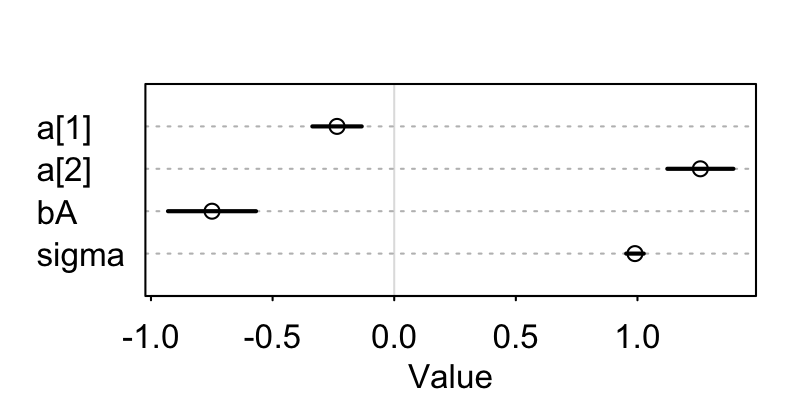

In [57]:
plot(precis(m6.9,depth=2))

Even though happiness has a fixed value at birth!

But if you omit marriage status, age has no effect.

In [58]:
m6.10 <- quap( alist(
    happiness ~ dnorm( mu , sigma ), 
    mu <- a + bA*A,
    a ~ dnorm( 0 , 1 ),
    bA ~ dnorm( 0 , 2 ),
    sigma ~ dexp(1) ) , 
    data=d2 )

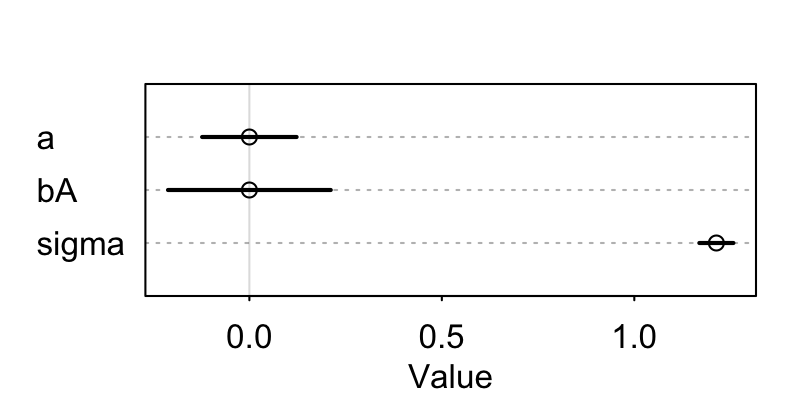

In [59]:
plot(precis(m6.10))

Collider bias can avoided when you sort out your DAG as above.

But collider bias might happen **also with unobserved variables!**

<img src="./img/colliderBiasUnobserved.png" alt="Drawing" style="width: 500px;"/>

P is a collider. Fixing P influences $G \rightarrow C$ through U.

## simulation
Linear models from the DAG above. G has ZERO effect on P and C, U is binary (good/bad neighbourhood)

In [64]:
N <- 200 # number of grandparent-parent-child triads 
b_GP <- 1 # direct effect of G on P
b_GC <- 0 # direct effect of G on C
b_PC <- 1 # direct effect of P on C
b_U<-2 #directeffectofUonPandC

set.seed(1)
U <- 2*rbern( N , 0.5 ) - 1
G <- rnorm( N )
P <- rnorm( N , b_GP*G + b_U*U )
C <- rnorm( N , b_PC*P + b_GC*G + b_U*U ) 
d <- data.frame( C=C , P=P , G=G , U=U )

In [65]:
m6.11 <- quap( alist(
            C ~ dnorm( mu , sigma ), 
            mu <- a + b_PC*P + b_GC*G,
            a ~ dnorm( 0 , 1 ), 
            c(b_PC,b_GC) ~ dnorm( 0 , 1 ), 
            sigma ~ dexp( 1 )), 
data=d )

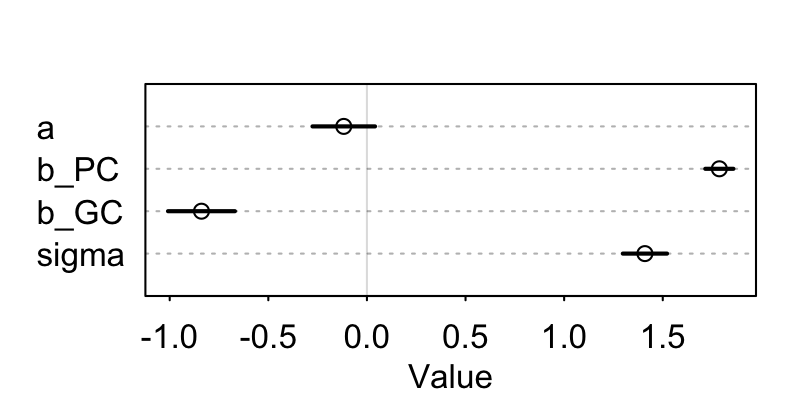

In [67]:
plot(precis(m6.11))

Grandparents have a negative influence on their grandchildren. **No wrong regression**, but wrong causal relationships.

This is the effect of including the collider P as predictor.
Example: knowing P is high tells you that G with low education is associated with a good neighbourhood. Information is flowing between G and U

# Blocking confounder paths

- **Information flows** through specific paths in a causal graph, e.g. in a collider, creating spurious relationships in your models.

- Any DAG has a composition of four elementary confounding paths: **Fork, Pipe, Collider**. Each can have a descendant.

<img src="./img/confounderTypes.png" alt="Drawing" style="width: 800px;"/>

<img src="./img/confounderTypes.png" alt="Drawing" style="width: 800px;"/>

- **Fork**: condition on Z (BLOCK the path) and X, Y becomes cond.indep.
- **Pipe**: condition on Z to *BLOCK* the path betweeen X, Y
- **Collider**: condition on Z *OPENS* the path between X, Y
- **Descendants**: applying one of the above to a descendant will only condition some of the information of Z, creating a partial (un)confounding effect.

# Exercise 6M2
## The importance of conditional association


exercise

In [73]:
library(dagitty)
dag.6m2 <- dagitty( "dag {
X -> Z 
Z -> Y
}")
coordinates(dag.6m2) <- list( x=c(X=0,Z=1,Y=2) , y=c(X=0,Z=0,Y=0) ) 

### Simulation
X,Z negatively correlated

In [84]:
options(repr.plot.width=4, repr.plot.height=1, repr.plot.res = 300) #resize plots

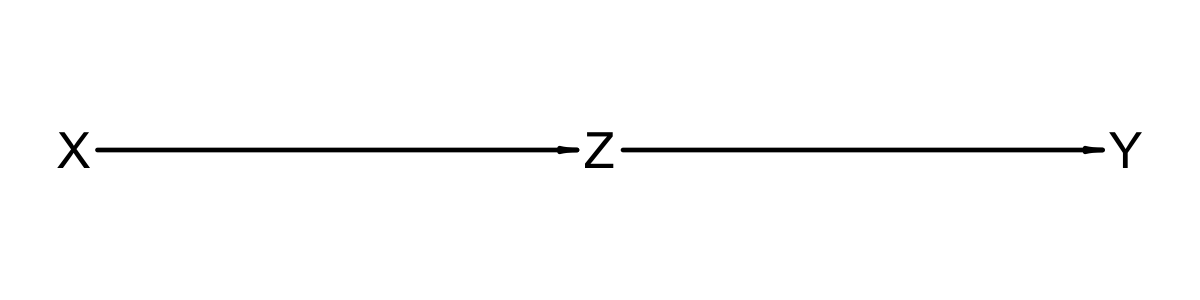

In [85]:
drawdag( dag.6m2 )

In [77]:
N = 100 #Nsamples
set.seed(123)
X = rnorm(N, 2) #root
Z = rnorm(N, -2*X) #pipe collider
Y = rnorm(N, 3*Z+1) #leaf
d.6m2 = data.frame(X=X, Z=Z, Y=Y)

In [91]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 200) #resize plots

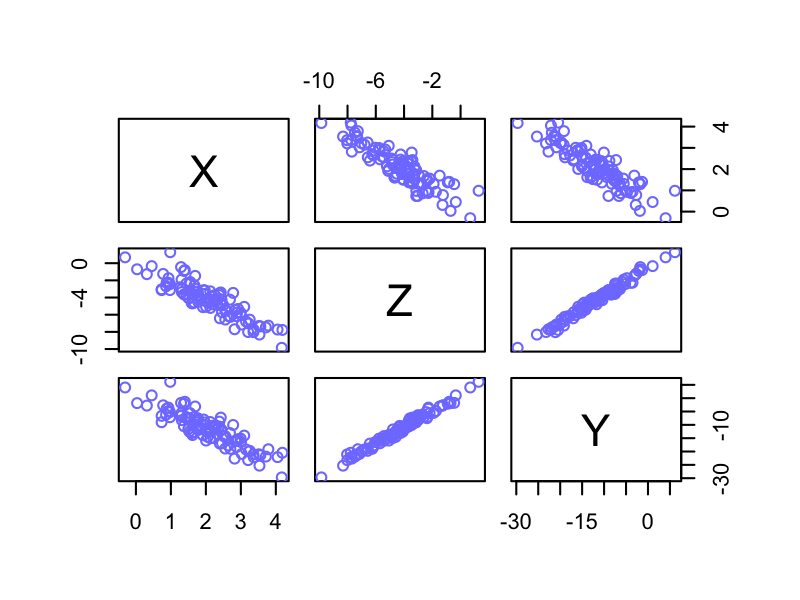

In [92]:
 pairs( ~ X + Z + Y , data=d.6m2 , col=rangi2 )

In [79]:
cor(X,Z)

[1] -0.8888493

In [108]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300) #resize plots

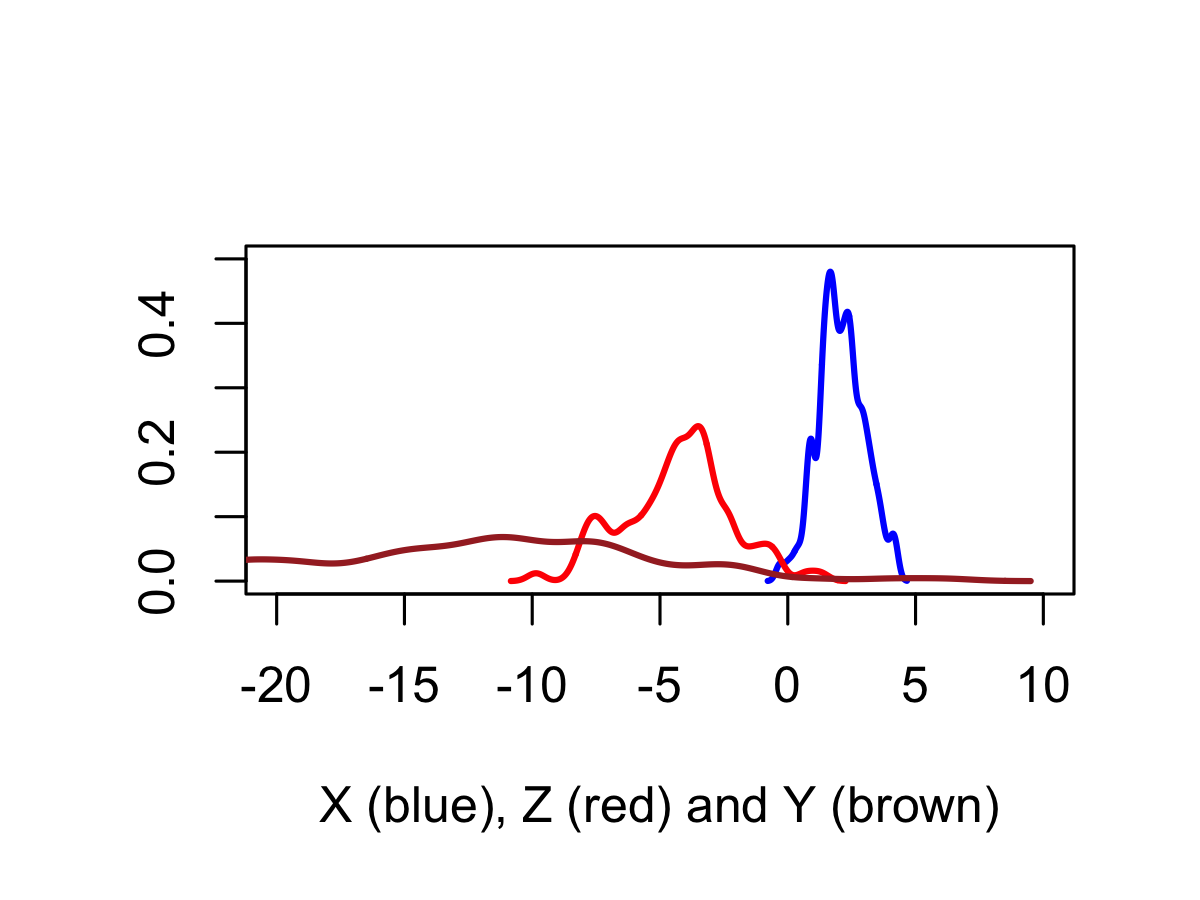

In [110]:
plot(NA,NA, xlim = c(-20,10),ylim = c(0,.5), , xlab="X (blue), Z (red) and Y (brown)", ylab = NA)
dens(X, add=T, col="blue" , lwd=2 )
dens(Z,add = T, col="red" , lwd=2 )
dens(Y,add = T, col="brown" , lwd=2 )

In [121]:
m.6m2 <- quap( alist(
        Y ~ dnorm( mu , sigma ) , 
        mu <- a + bXY*X + bZY*Z,
        a ~ dnorm( 5 , 100 ) ,
        bXY ~ dnorm( -5 , 10 ) ,
        bZY ~ dnorm( -5 , 10 ),
        sigma ~ dexp( 1 ) ),
        data=d.6m2 ) 

Knowing X does not add much information to knowing Z. **Z sucks all the information from its only cause X**, left to be ininfluent in the model, similarly to the post-treatment bias example.

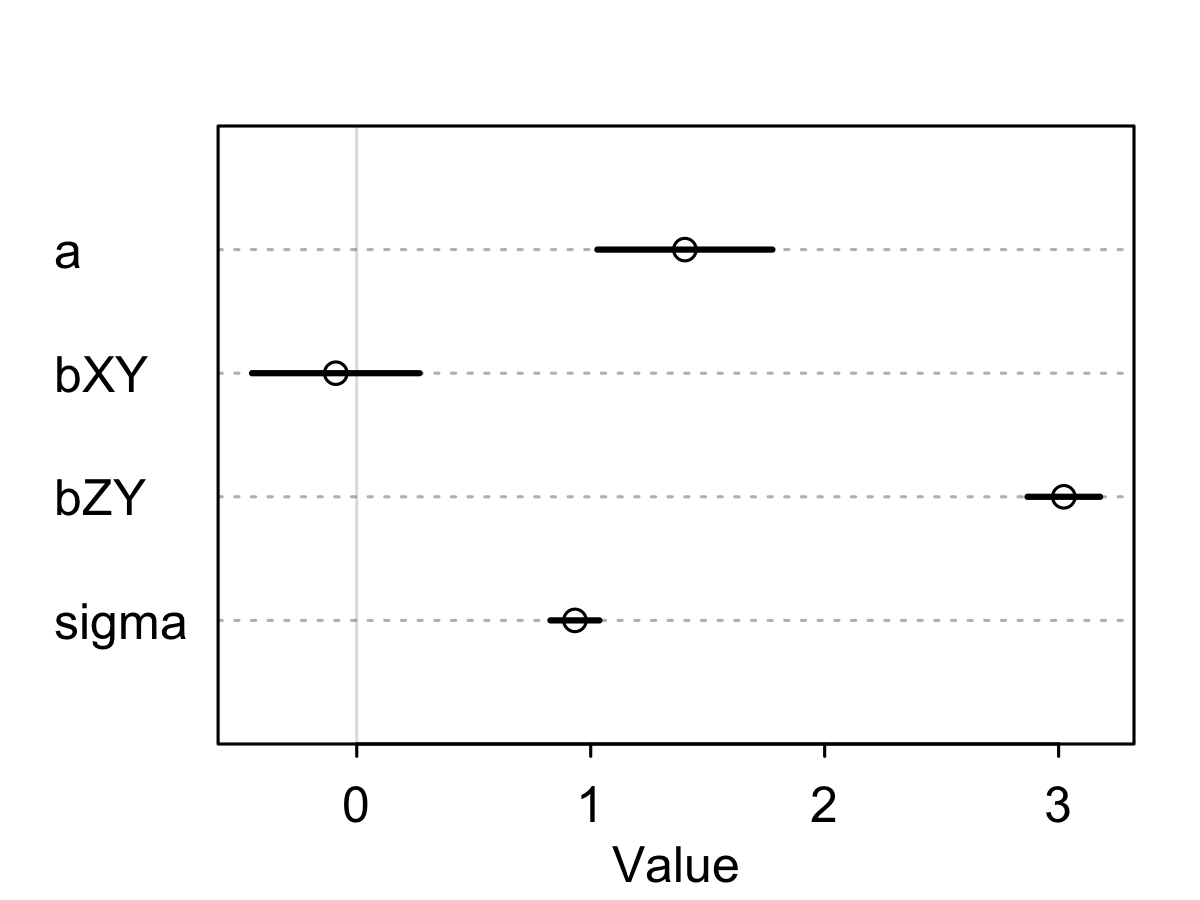

In [123]:
plot( precis(m.6m2))

This because **knowing Z closes the confounding pipe**

In [159]:
impliedConditionalIndependencies(dag.6m2)

X _||_ Y | Z

We do not have same collinearity as in the legs example, **where the output was a collider**. Marginal posteriors are still correlated...

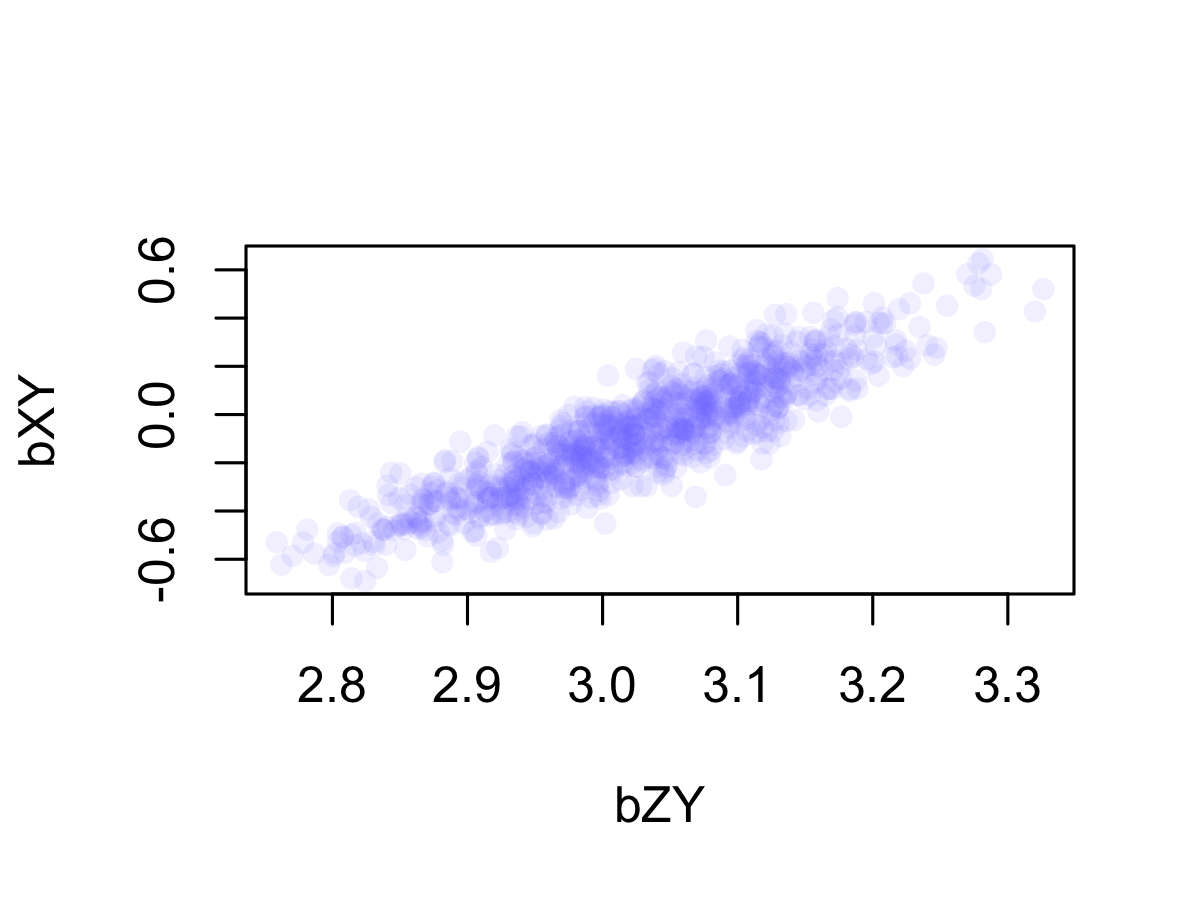

In [151]:
post = extract.samples(m.6m2, n = 1000)
plot( bXY ~ bZY , post , col=col.alpha(rangi2,0.1) , pch=16 )

In [152]:
cor(post$bXY, post$bZY)

[1] 0.8950111

but they do not sum to the effect of including only X

In [157]:
m.6m2.red <- quap( alist(
        Y ~ dnorm( mu , sigma ) , 
        mu <- a + bXY*X,
        a ~ dnorm( 0 , 100 ) ,
        bXY ~ dnorm( 10 , 10 ) ,
        sigma ~ dexp( 1 ) ),
        data=d.6m2 ) 

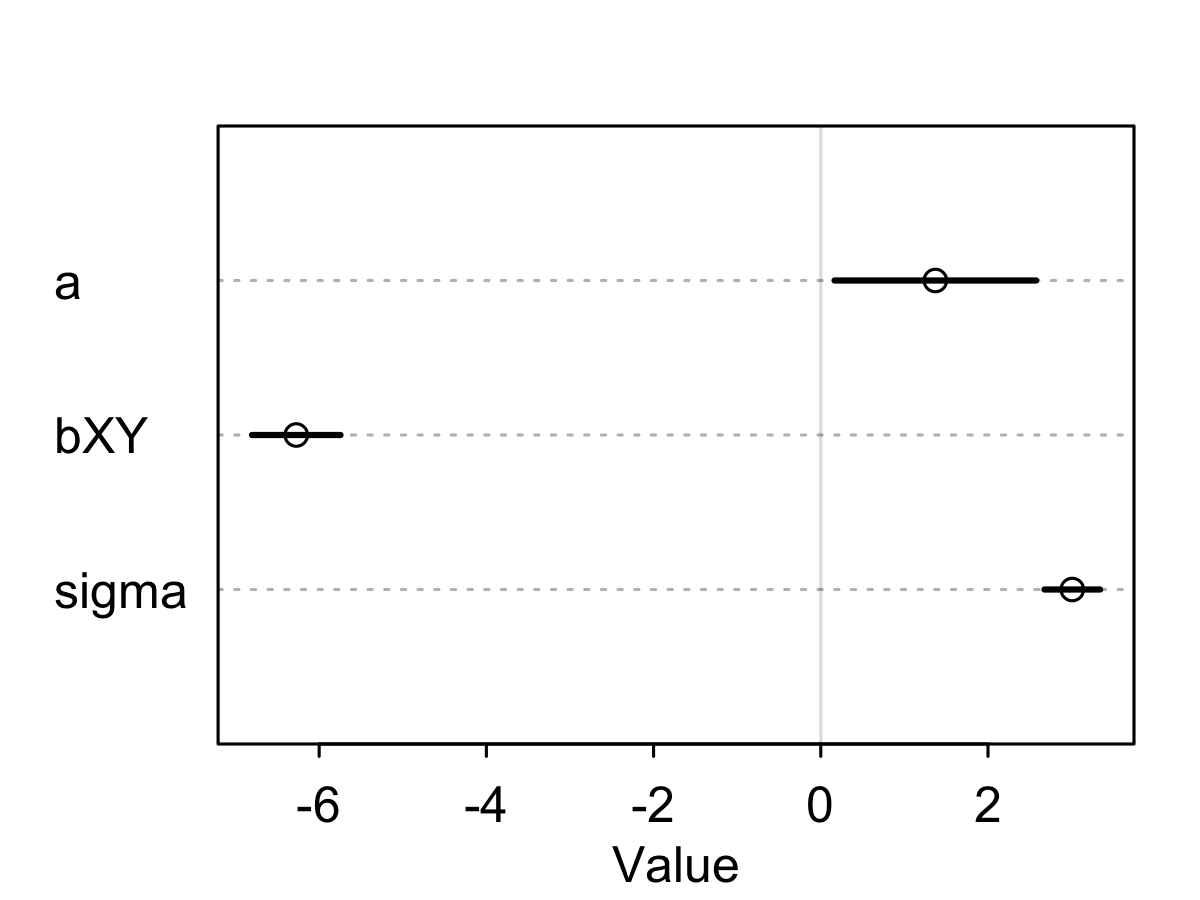

In [158]:
plot(precis(m.6m2.red))

# Chapter 7

## Ulisses' Compass
Regularization and predictive accuracy

Statistical model design needs us to navigate through


- <font color="red">overfitting</font>
- <font color="red">underfitting</font>
- <font color="red">confounding (chapter 6)</font>


How do I **define and evaluate** a model managing **regular/irregular features**?

Do I need to **predict** or want to **understand causal structure**?

More parameters (predictors) **generally improve fit** (the variance explained).
<img src="./img/increasingR.png" alt="Drawing" style="width: 500px;"/>


But less parameters can be a problem (Leave-One-Out models give differing posteriors)
<img src="./img/LOOunderfit.png" alt="Drawing" style="width: 500px;"/>


## Measuring the model accuracy

Based on information theory - the **measure of statistic uncertainty** of using some distributions to model the unknown distribution of observations

**Entropy** (average log-prob of an event) is continuous, increases with num. of events and is additive

$$ H(p) = -\pmb E log(p) = -\sum_{i=1}^N p_i log(p_i)$$

**KL divergence** compares a modeling distribution q with the target distribution p. It is NOT symmetric (Mars-Earth and Earth-Mars example).

$$ D_{KL}(q,p) = \sum_i p_i log\Big (\frac{p_i}{q_i}\Big ) $$

**KL-divergence** is the difference between 
- the cross entropy $H(p,q)$ (where events arising with their target probability are expected with a model distribution) 
- the actual entropy $H(p)$ (describing the target distribution of the data)

In real life the **target is unknown**, but 

$$ D_{KL}(q,p)-D_{KL}(r,p) = \pmb E_plog(r)-E_plog(q) \propto \sum_i \log(r_i) - \sum_i \log(q_i) =: S(r) - \pmb S(q) $$

so two candidate distributions can be compared to **know relatively the divergence from p (deviance)**.

### In practice:

- $r,q$ are posteriors
- for each observation, there is (are) a posterior distribution(s), for which you need parameters' samples
- for each $i$, average the posterior distribution linked to observation $i$ (lppd) and marginal posterior samples $s$
$$ lppd(y,\Theta) = \sum_i \log \frac{1}{N} \sum_n p(y_i|\theta_n)$$
- ideally you train on a training set, but score on a test set

Brain volume as a function of body mass - linear model

\begin{align*}
&b_i \sim \mathcal N(\mu_i,\sigma); \quad\mu_i = \alpha + \beta m_i \\
&\alpha \sim \mathcal N(.5, 1); \quad\beta \sim \mathcal N(0,10); \quad\alpha \sim \ln \mathcal N(0,1)\\
\end{align*}

In [ ]:
## Create dataset
sppnames <- c( "afarensis","africanus","habilis","boisei", "rudolfensis","ergaster","sapiens") #homus list
brainvolcc <- c( 438 , 452 , 612, 521, 752, 871, 1350 ) #cc of brain volume
masskg <- c( 37.0 , 35.5 , 34.5 , 41.5 , 55.5 , 61.0 , 53.5 ) #kg mass
d <- data.frame( species=sppnames , brain=brainvolcc , mass=masskg )
## Standardize
d$mass_std <- (d$mass - mean(d$mass))/sd(d$mass) 
d$brain_std <- d$brain / max(d$brain)

In [5]:
m7.1 <- quap( alist( brain_std ~ dnorm( mu , exp(log_sigma) ), 
                     mu <- a + b*mass_std,
                     a ~ dnorm( 0.5 , 1 ),
                     b ~ dnorm( 0 , 10 ),
                     log_sigma ~ dnorm( 0 , 1 ) ), data=d )

In [6]:
R2_is_bad <- function( quap_fit ) { s <- sim( quap_fit , refresh=0 ) 
                                    r <- apply(s,2,mean) - d$brain_std 
                                    1 - var2(r)/var2(d$brain_std) }

In [12]:
R2=R2_is_bad(m7.1)

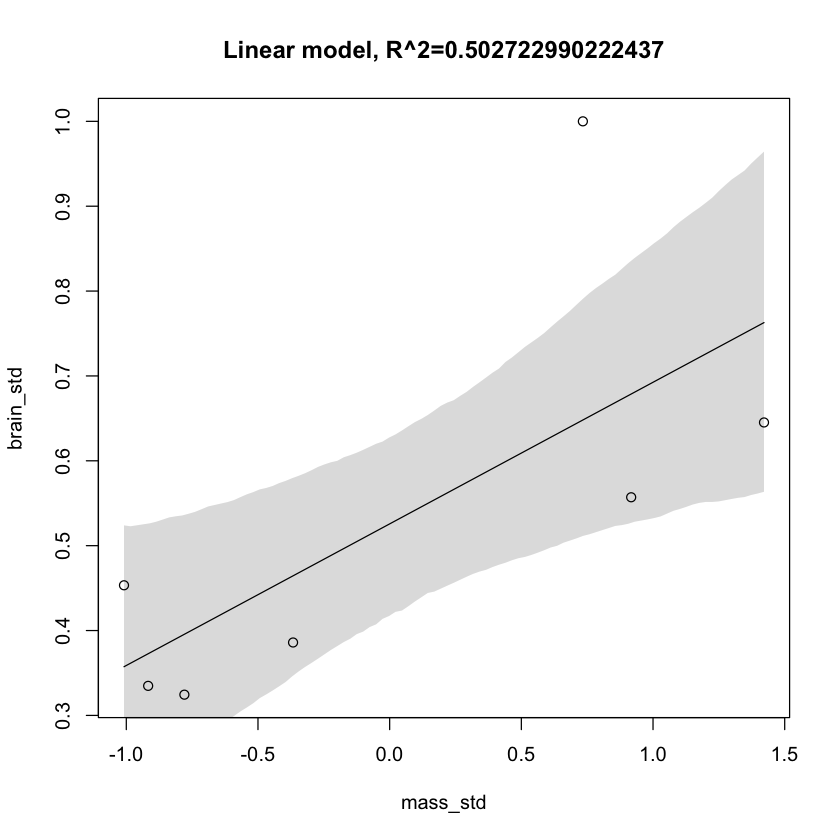

In [18]:
post <- extract.samples(m7.1) #extract marginal posteriors
mass_seq <- seq( from=min(d$mass_std) , to=max(d$mass_std) , length.out=100 ) #grid input
#calculate model values using posteriors for EACH value of the grid
l <- link( m7.1 , data=list( mass_std=mass_seq ) )
#brain volume posterior mean and CI for each grid value
mu <- apply( l , 2 , mean ); ci <- apply( l , 2 , PI )

plot( brain_std ~ mass_std , data=d, main=paste('Linear model, R^2=',as.character(R2),sep=''))
lines( mass_seq , mu )
shade( ci , mass_seq )

### Calculate $ lppd(y,\Theta) = \sum_i \log \frac{1}{N} \sum_n p(y_i|\theta_n)$

In [39]:
set.seed(1); lppd( m7.1 , n=1e4 )

[1]  0.6098670  0.6483440  0.5496092  0.6234936  0.4648145  0.4347607 -0.8444639

That is

In [37]:
logprob <- sim( m7.1 , ll=TRUE , n=1e4 ) #simulate 10000 posteriors for each data point
n <- ncol(logprob); ns <- nrow(logprob)
f <- function( i ) log_sum_exp( logprob[,i] ) - log(ns) 
( lppd <- sapply( 1:n , f ) )

[1]  0.6130167  0.6511801  0.5446837  0.6268520  0.4631037  0.4287143 -0.8619043

## Regularizing priors

Changing the **prior's confidence w.r.t your data** changes the fit over regular/irregular features. 

Less conservative priors allow for more variation of the observed outcome.
<img src="./img/regPrior.png" alt="Drawing" style="width: 300px;"/>

The **quantity of data available** will influence the effect of regularization (blue=training, black=out of sample)

Regularizing is especially good with limited data size.

<img src="./img/dataEffectRegul.png" alt="Drawing" style="width: 600px;"/>

## Accuracy prediction

If you do not have an out of sample test set, you can resort to predicting your accuracy. There are various strategies:

- **Cross-validation**. For example LOOCV (leave one out cross validation): **average over LPPDs** removing a datapoint at a time 
    - LOOCV leads to **PSIS (Pareto) approximation**
    - The Pareto parameter $k$ gives **reliability of the approximation** ($k<0.5$ or $k<.7$ for reliable approximation)


- Information criteria: **estimate of relative KL divergence**. AIC has a term increasing with twice the num. of parameter (in linear models).
    $$AIC = -2 * LPPD + 2|\theta|$$ 

**AIC** needs some **restrictive assumptions** on likelihood>>priors, N>>p, gaussian posterior at infinite N.

**WAIC** relaxes those assumptions. It includes a **more complicated penalty term**:
 
- $$WAIC(y,\Theta) = -2\Big(lppd -\sum_i var_\theta \log p(y_i|\theta)\Big) = -2\Big(lppd - \sum_i \lambda_i\Big)$$

- standard error (from CLT): $$ s_{WAIC} = \sqrt{ N \cdot var \big(lppd - [\lambda_1,\dots,\lambda_N]\big)} $$

**IMPORTANT**: CV and Information criteria are **calculated pointwise**, so you can study the effect of single datapoints on penalty, PSIS's parameter k, ...

Predicting the true accuracy
<img src="./img/regulCompare copy.png" alt="Drawing" style="width: 700px;"/>

### Example: fungal treatment (Chpt 6)


Information Criteria are **<font color="green">FOR prediction</font>**, **<font color="red">NOT Causality</font>**

In [41]:
set.seed(71)
# number of plants 
N <- 100
# simulate initial heights 
h0 <- rnorm(N,10,2)
# assign treatments and simulate fungus and growth 
treatment <- rep( 0:1 , each=N/2 )
fungus <- rbinom( N , size=1 , prob=0.5 - treatment*0.4 ) 
h1 <- h0 + rnorm(N, 5 - 3*fungus)
# compose a clean data frame
d <- data.frame( h0=h0 , h1=h1 , treatment=treatment , fungus=fungus ) 
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
h0,9.95978,2.1011623,6.570328,13.07874,▁▂▂▂▇▃▂▃▁▁▁▁
h1,14.39920,2.6880870,10.618002,17.93369,▁▁▃▇▇▇▁▁
treatment,0.50000,0.5025189,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇
fungus,0.23000,0.4229526,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▂


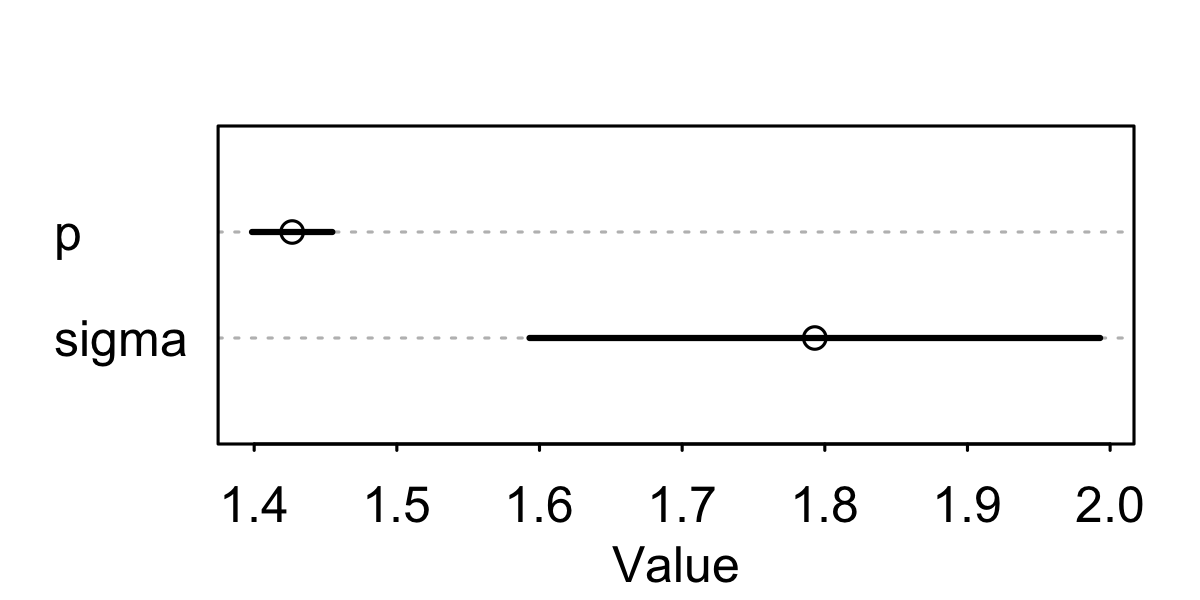

In [48]:
growth <- quap( alist(
        h1 ~ dnorm( mu , sigma ), 
        mu <- h0*p,
        p ~ dlnorm( 0 , 0.25 ), sigma ~ dexp( 1 )), 
        data=d ) 
options(repr.plot.width=4, repr.plot.height=2, repr.plot.res = 300) #resize plots
plot(precis(growth))

In [49]:
treat_fungi <- quap( alist(
            h1 ~ dnorm( mu , sigma ),
            mu <- h0 * p,
            p <- a + bt*treatment + bf*fungus, 
            a ~ dlnorm( 0 , 0.2 ) , bt ~ dnorm( 0 , 0.5 ), bf ~ dnorm( 0 , 0.5 ),
            sigma ~ dexp( 1 )), 
            data=d ) 
precis(treat_fungi)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.481390625,0.02451064,1.44221788,1.52056337
bt,0.002413196,0.02986959,-0.04532418,0.05015057
bf,-0.266718089,0.03654765,-0.32512829,-0.20830789
sigma,1.408794484,0.09862019,1.25118037,1.56640860


In [50]:
treat <- quap( alist(
            h1 ~ dnorm( mu , sigma ),
            mu <- h0 * p,
            p <- a + bt*treatment, 
            a ~ dlnorm( 0 , 0.2 ) , bt ~ dnorm( 0 , 0.5 ),
            sigma ~ dexp( 1 )), 
            data=d ) 
precis(treat)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.38035050,0.02517689,1.34011297,1.4205880
bt,0.08499642,0.03429897,0.03018004,0.1398128
sigma,1.74640906,0.12193162,1.55153879,1.9412793


Better WAIC including all predictors

In [51]:
set.seed(11) 
WAIC( treat_fungi )

WAIC,lppd,penalty,std_err
<dbl>,<dbl>,<dbl>,<dbl>
361.4511,-177.1724,3.553208,14.1704


In [52]:
set.seed(77)
compare( growth , treat_fungi , treat )

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
treat_fungi,361.8901,14.26196,0.00000,NA,3.839503,1.000000e+00
treat,402.7753,11.28130,40.88520,10.47816,2.645609,1.324010e-09
growth,405.9147,11.65023,44.02462,12.22698,1.581705,2.755335e-10


In [55]:
set.seed(91)
waic_treatfungi <- WAIC( treat_fungi , pointwise=TRUE )$WAIC 
waic_treat <- WAIC( treat , pointwise=TRUE )$WAIC 
n <- length(waic_treatfungi)
diff_treatfungi_treat <- waic_treatfungi - waic_treat
sqrt( n*var( diff_treatfungi_treat ) )

[1] 10.35788

Differences from the best model have large WAIC standard error

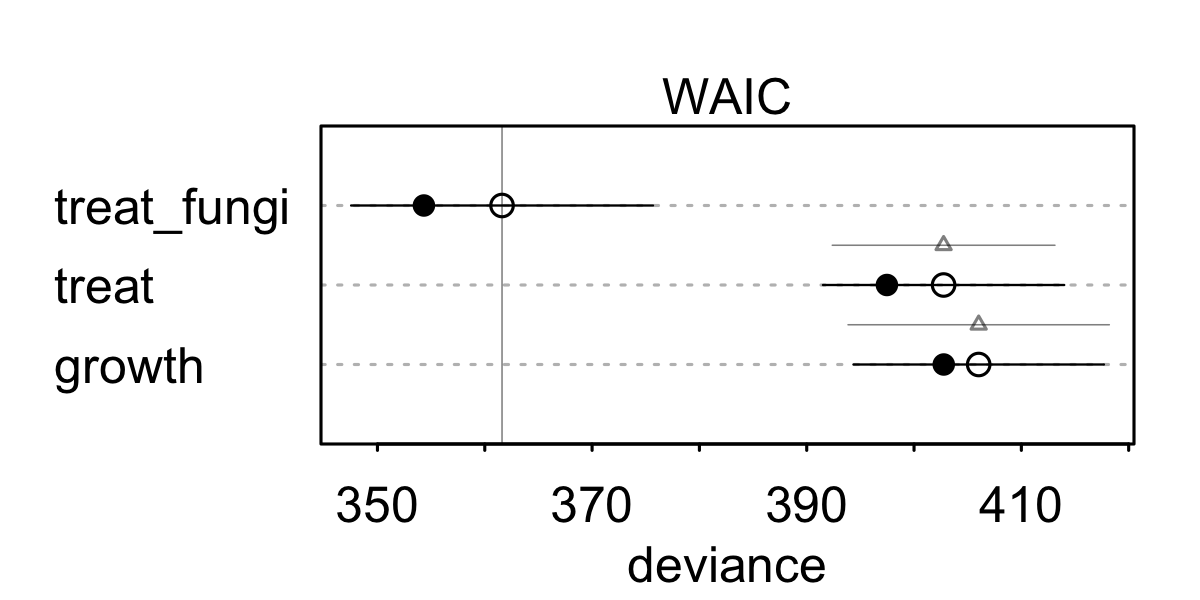

In [56]:
#white dot=WAIC, black dot=deviance, gray line= SD(difference)
plot( compare( growth , treat_fungi , treat ) )

Same holds for PSIS. It gives no warnings about k in this model.

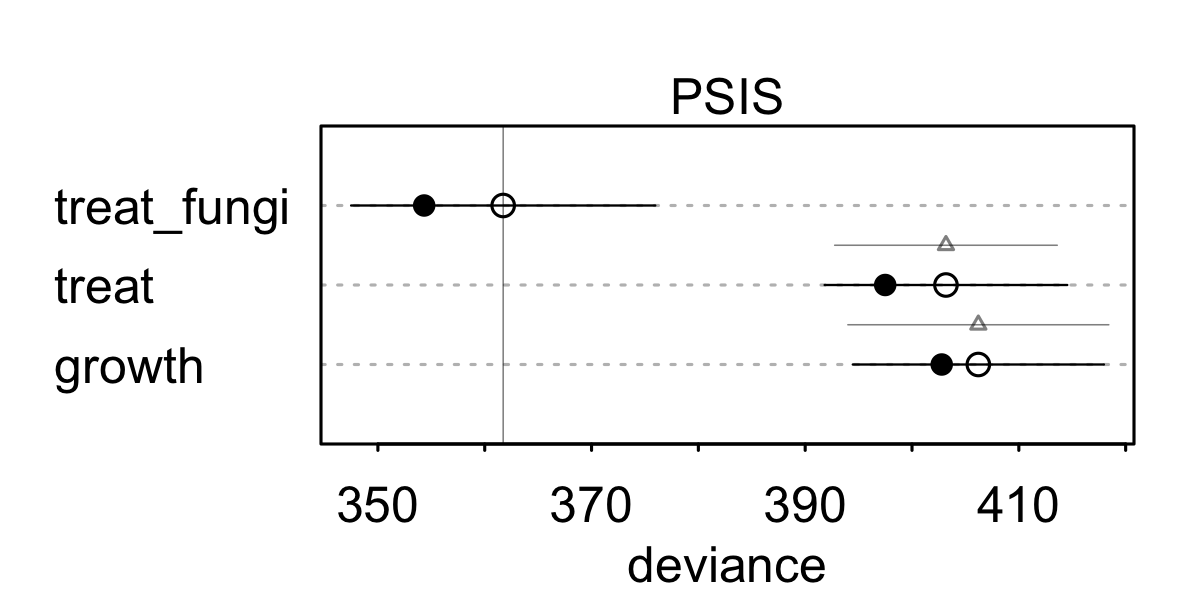

In [57]:
plot( compare( growth , treat_fungi , treat, func = 'PSIS' ) )

In [59]:
set.seed(92)
#waic_growth <- WAIC( growth , pointwise=TRUE )$WAIC 
#diff_growth_treat <- waic_growth - waic_treat
#sqrt( n*var( diff_growth_treat ) )
compare( growth , treat_fungi , treat )@dSE

,growth,treat_fungi,treat
growth,NA,12.23192,4.941351
treat_fungi,12.231923,NA,10.440008
treat,4.941351,10.44001,NA


- WAIC and PSIS are useful for prediction

- do not select the best model, but compare differences.

    - what model is best? 
    - how much difference there is?
    - which points are influencing the result?
    
- Again, the most realistic model is not necessarily the best one

### Example: waffle houses and divorces


Model complexity and outliers

In [231]:
library(rethinking) 
data(WaffleDivorce) 
d <- WaffleDivorce 
d$A <- standardize( d$MedianAgeMarriage )
d$D <- standardize( d$Divorce )
d$M <- standardize( d$Marriage )

age <- quap( alist( D ~ dnorm( mu , sigma ) , 
                    mu <- a + bA * A ,
                    a ~ dnorm( 0 , 0.2 ) , bA ~ dnorm( 0 , 0.5 ) , 
                    sigma ~ dexp( 1 ) ) , data = d )

marRate <- quap( alist( D ~ dnorm( mu , sigma ) ,
                        mu <- a + bM * M ,
                        a ~ dnorm( 0 , 0.2 ) , bM ~ dnorm( 0 , 0.5 ) , 
                        sigma ~ dexp( 1 ) ) , data = d )

age_marRate <- quap( alist( D ~ dnorm( mu , sigma ) , 
                            mu <- a + bM*M + bA*A , 
                            a ~ dnorm( 0 , 0.2 ) , 
                            bM ~ dnorm( 0 , 0.5 ) , bA ~ dnorm( 0 , 0.5 ) , 
                            sigma ~ dexp( 1 )) , data = d )

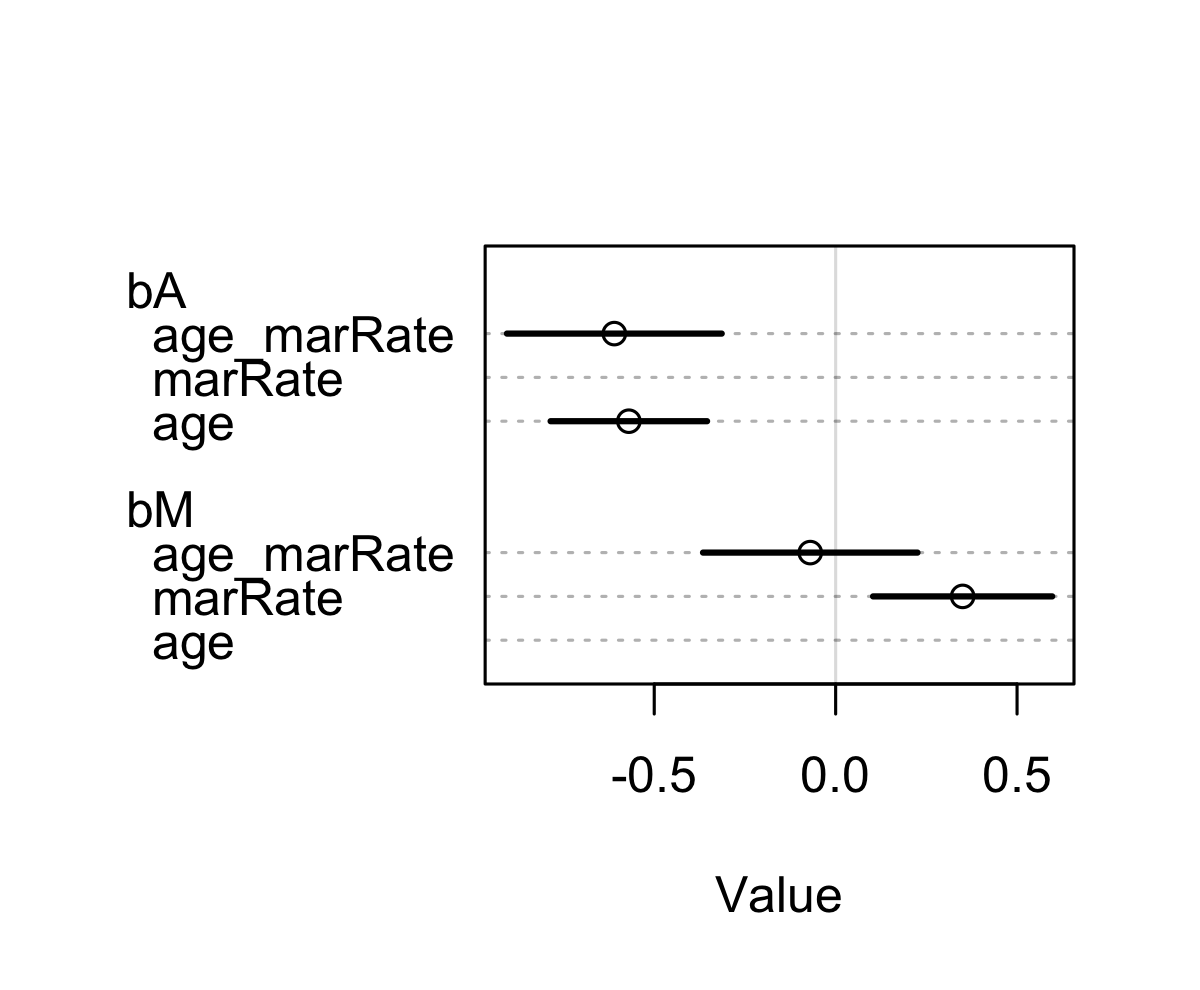

In [233]:
options(repr.plot.width=4, repr.plot.height=3.3, repr.plot.res = 300) #resize plots
plot( coeftab(age, marRate, age_marRate), par=c('bA','bM') )

PSIS detects anomalies. Some approximations have infinite variance. The age-based model seems the best (as it was in the causal model)

In [73]:
compare( age , marRate , age_marRate , func=PSIS )

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,127.2787,14.52577,0.000000,NA,4.576489,0.7961139822
age_marRate,130.0116,15.47129,2.732934,1.298906,6.227212,0.2030140637
marRate,140.9122,11.28144,13.633522,10.671833,3.897346,0.0008719541


Some points have both high WAIC penalty and high PSIS-k 

In [ ]:
set.seed(24071847)
PSIS_ageMarRate <- PSIS(age_marRate,pointwise=TRUE)
set.seed(24071847)
WAIC_ageMarRate <- WAIC(age_marRate,pointwise=TRUE)
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



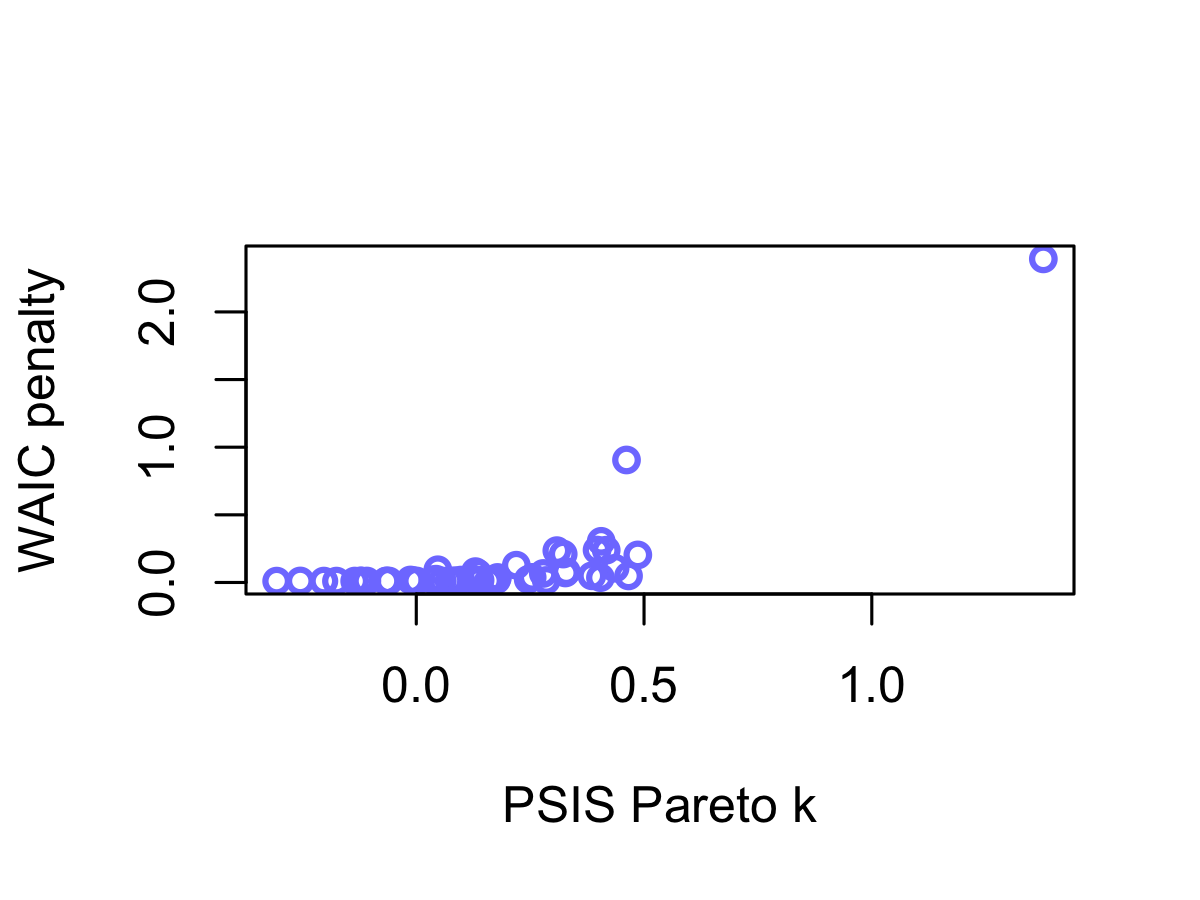

In [78]:
plot( PSIS_ageMarRate$k , WAIC_ageMarRate$penalty , xlab="PSIS Pareto k" ,
    ylab="WAIC penalty" , col=rangi2 , lwd=2 )

The penalty comes from too much variance: the prediction curve swings a lot to overfit the outliers. Note that the penalty term is 3 times the number of parameters in the age + marriage rate model!

In [79]:
WAIC(age_marRate)

WAIC,lppd,penalty,std_err
<dbl>,<dbl>,<dbl>,<dbl>
128.4831,-58.79194,5.449622,14.35516



We can regularize with a Student's t distribution with heavier tails

In [82]:
age_marRate_t <- quap( alist( D ~ dstudent( 2 , mu , sigma ) , 
                              mu <- a + bM*M + bA*A ,
                              a ~ dnorm( 0 , 0.2 ) ,
                              bM ~ dnorm( 0 , 0.5 ) , bA ~ dnorm( 0 , 0.5 ) ,
                              sigma ~ dexp( 1 ) ) , data = d )
PSIS(age_marRate_t)

PSIS,lppd,penalty,std_err
<dbl>,<dbl>,<dbl>,<dbl>
134.0506,-67.02531,7.0702,11.91619


More deviance and higher WAIC

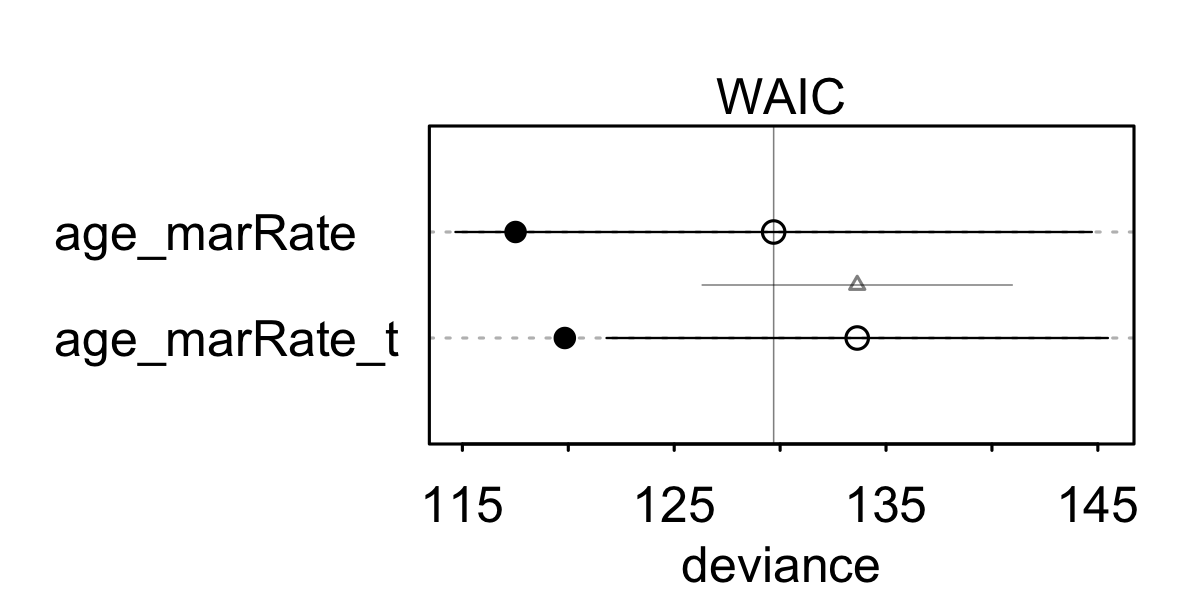

In [236]:
options(repr.plot.width=4, repr.plot.height=2, repr.plot.res = 300)
plot(compare(age_marRate_t,age_marRate))

a bit higher penalty (more variance from the t distribution) but lower standard error in WAIC

In [238]:
compare(age_marRate_t,age_marRate)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age_marRate,129.0269,14.35271,0.000000,NA,5.705529,0.93617699
age_marRate_t,134.3983,11.80654,5.371382,6.840711,7.291571,0.06382301


No warning in PSIS for the regularized model.

In [240]:
compare(age_marRate_t,age_marRate, func = 'PSIS')

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age_marRate,129.2865,15.11381,0.000000,NA,5.868607,0.8904523
age_marRate_t,133.4772,11.92755,4.190739,7.349959,6.811609,0.1095477


## Exercise: Handdrawn curve and outliers
<img src="./img/7H1.png" alt="Drawing" style="width: 1000px;"/>

In [91]:
data(Laffer)
head(Laffer)

,tax_rate,tax_revenue
,<dbl>,<dbl>
1,0.07,-0.06
2,8.81,2.45
3,12.84,3.58
4,16.24,2.19
5,19.18,2.46
6,19.29,1.95


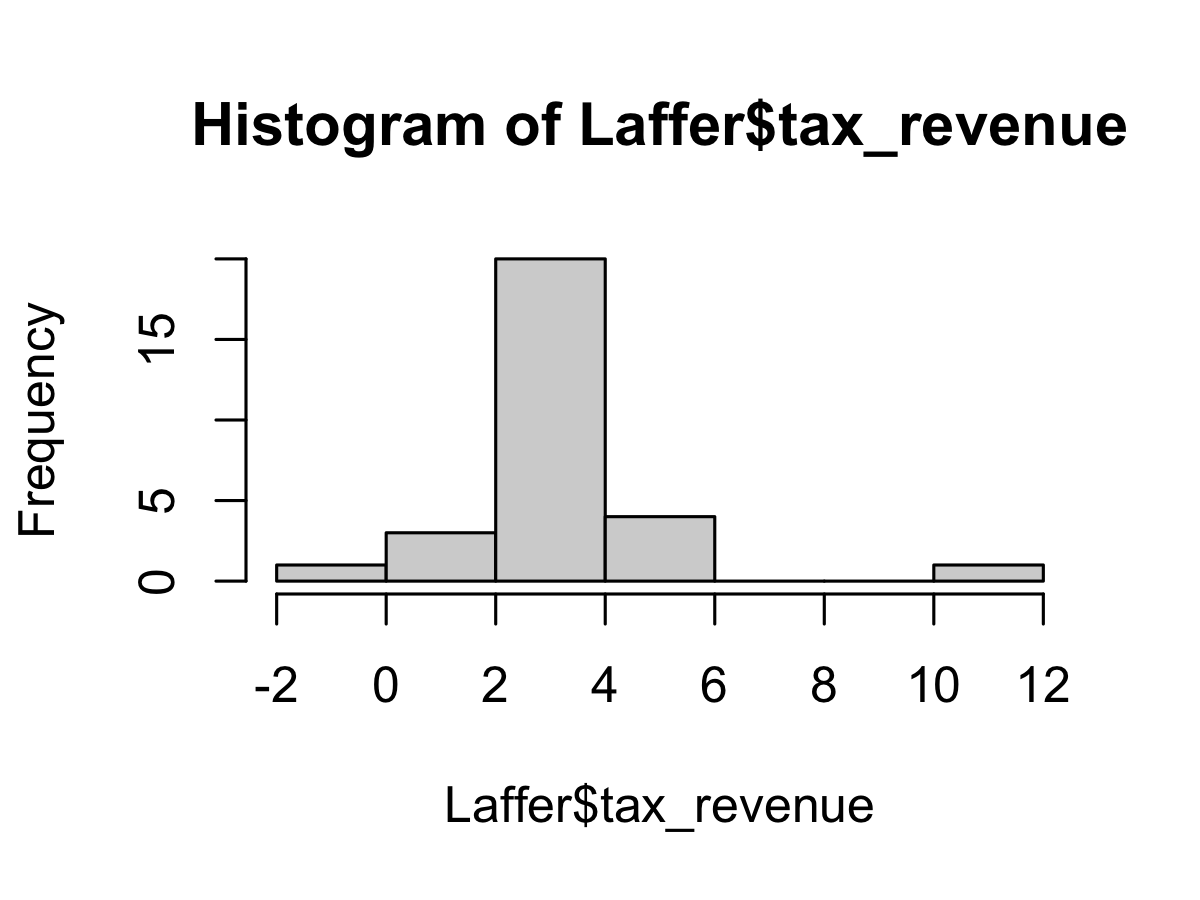

In [100]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
hist(Laffer$tax_revenue)

Standardize the rate, keep the revenue as it is.

In [241]:
d <- data.frame(rate = Laffer$tax_rate/max(Laffer$tax_rate),
                revenue = Laffer$tax_revenue)
head(d)

,rate,revenue
,<dbl>,<dbl>
1,0.001975727,-0.06
2,0.248659328,2.45
3,0.362404742,3.58
4,0.458368614,2.19
5,0.541349139,2.46
6,0.544453853,1.95


## Unregularized modeling

linear, quadratic and cubic regression of the revenue's mean

In [242]:
m.line <- quap( alist( revenue ~ dnorm(mu , sigma ), 
                              mu <- a + Brate*rate ,
                              a ~ dnorm( 0 , 100 ) ,
                              Brate ~ dnorm( 0.5 , 1 ),
                              sigma ~ dexp( 1 ) ) , data = d )
options(repr.plot.width=4, repr.plot.height=1.5, repr.plot.res = 300)

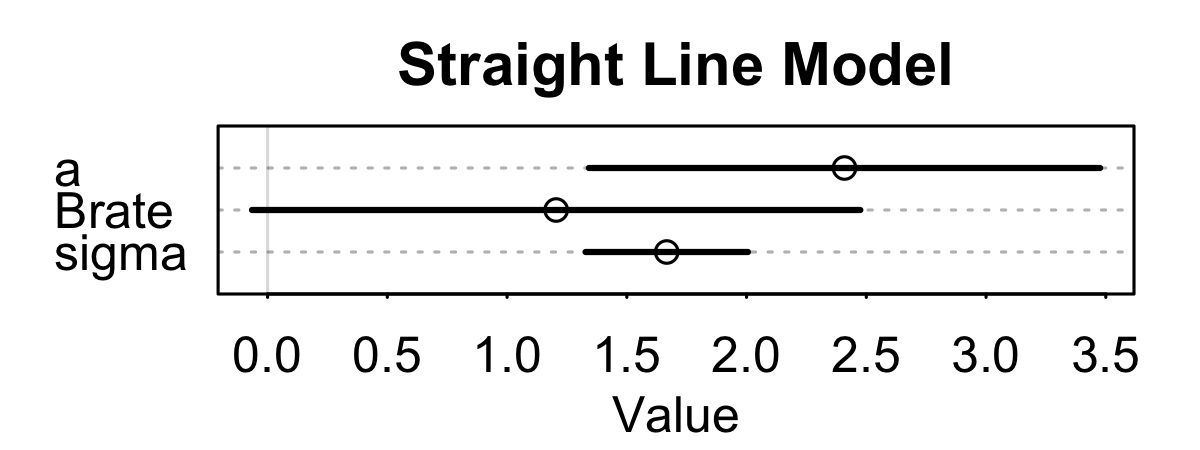

In [243]:
plot(precis(m.line), main='Straight Line Model')

In [255]:
m.quad <- quap( alist( revenue ~ dnorm(mu , sigma ) , 
                              mu <- a + Brate*rate + B2rate*rate^2 ,
                              a ~ dnorm( 0 , 100 ) ,
                              Brate ~ dnorm( 0, 10 ), B2rate ~ dnorm( 0, 10 ),
                              sigma ~ dexp( 1 ) ) , data = d )

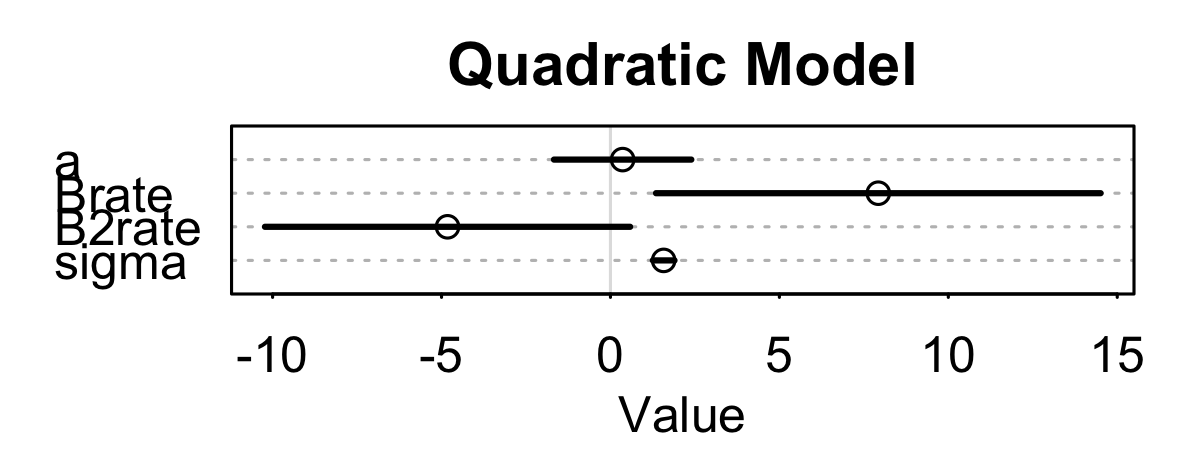

In [256]:
plot(precis(m.quad), main='Quadratic Model')

In [259]:
m.cubic <- quap( alist( revenue ~ dnorm(mu , sigma ) , 
                              mu <- a + Brate*rate + B2rate*rate^3 + B2rate*rate^3 ,
                              a ~ dnorm( 0 , 100 ) ,
                              Brate ~ dnorm( 5, 10 ), B2rate ~ dnorm( -5, 10 ),
                              B3rate ~ dnorm( 5, 10 ), sigma ~ dexp( 1 ) ) , data = d )

The cubic model is especially overfitting, trying to adapt to outliers with the third degree variable

In [ ]:
options(repr.plot.width=4, repr.plot.height=1.8, repr.plot.res = 300)

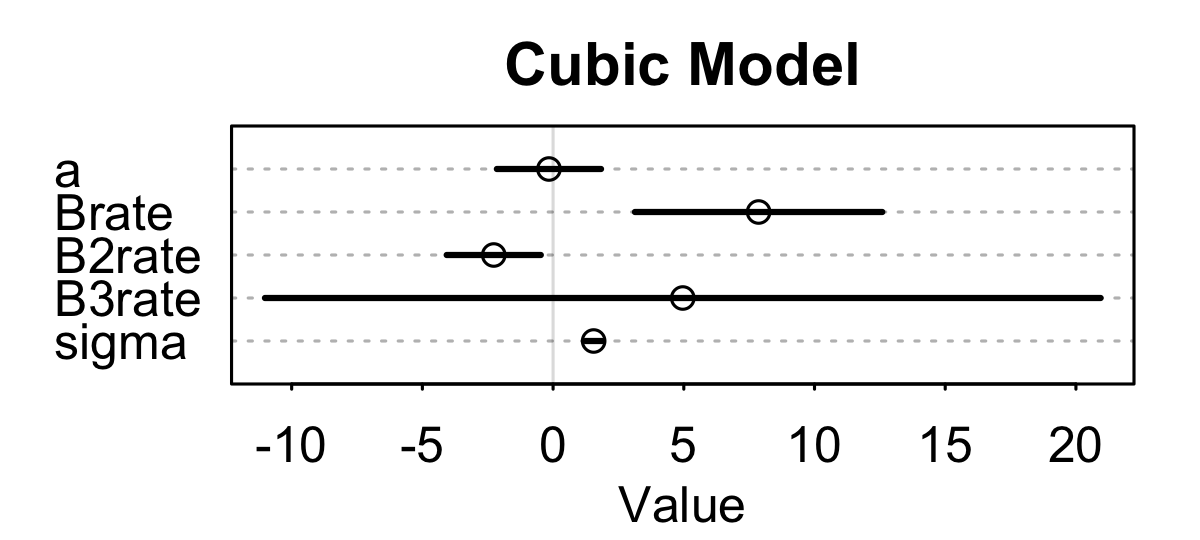

In [261]:
plot(precis(m.cubic), main='Cubic Model')

## Information criteria

WAIC has high penalties and very high standard errors, without any model having much higher performance than the other

In [263]:
compare( m.line, m.quad, m.cubic)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m.line,124.2333,22.80994,0.0000000,NA,6.155154,0.4656998
m.cubic,124.8466,25.06759,0.6132662,3.627020,8.080318,0.3427181
m.quad,126.0097,26.35443,1.7764500,4.305324,8.334508,0.1915821


PSIS-k produce warningswith $k>1$. Again, high penalties (more than $2*parameters$), large errors and equally performing PSIS values

In [266]:
compare( m.line, m.quad, m.cubic , func=PSIS )

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m.cubic,126.2312,26.74120,0.000000,NA,8.831105,0.693123138
m.quad,127.9152,28.64675,1.683920,2.153615,9.247977,0.298642656
m.line,135.0971,33.74315,8.865821,7.582962,11.668193,0.008234206


Which points are problematic in WAIC's penalty vs PSIS-k?

In [267]:
set.seed(1)
PSIS_line <- PSIS(m.line, pointwise=TRUE)
PSIS_quad <- PSIS(m.quad, pointwise=TRUE)
PSIS_cubic <- PSIS(m.cubic, pointwise=TRUE)
set.seed(1)
WAIC_line <- WAIC(m.line, pointwise=TRUE)
WAIC_quad <- WAIC(m.quad, pointwise=TRUE)
WAIC_cubic <- WAIC(m.cubic, pointwise=TRUE)

options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)




Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



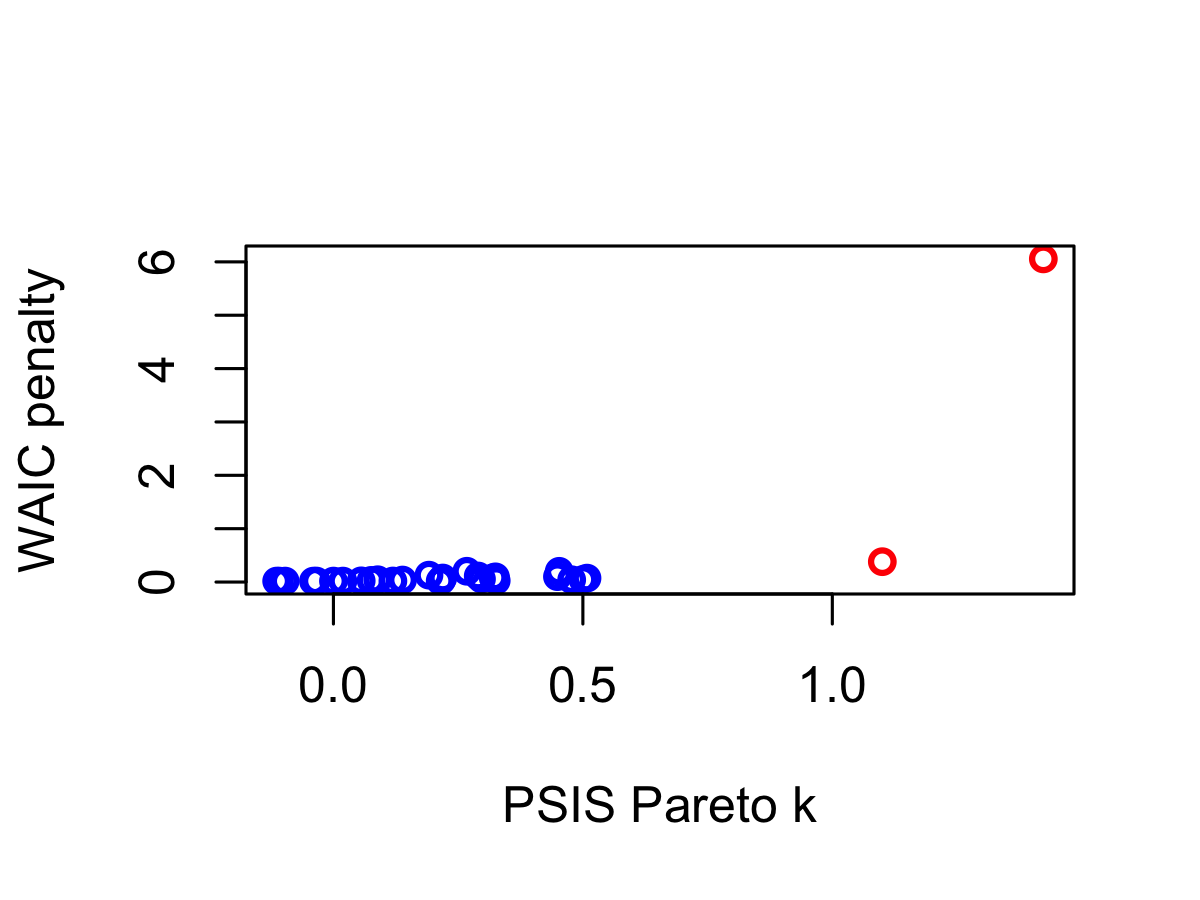

In [268]:
plot( PSIS_quad$k , WAIC_quad$penalty , 
      xlab="PSIS Pareto k", ylab="WAIC penalty", 
      col=ifelse(PSIS_quad$k>=1, 'red', 'blue') , lwd=2 )

Related problematic datapoints for PSIS-k values

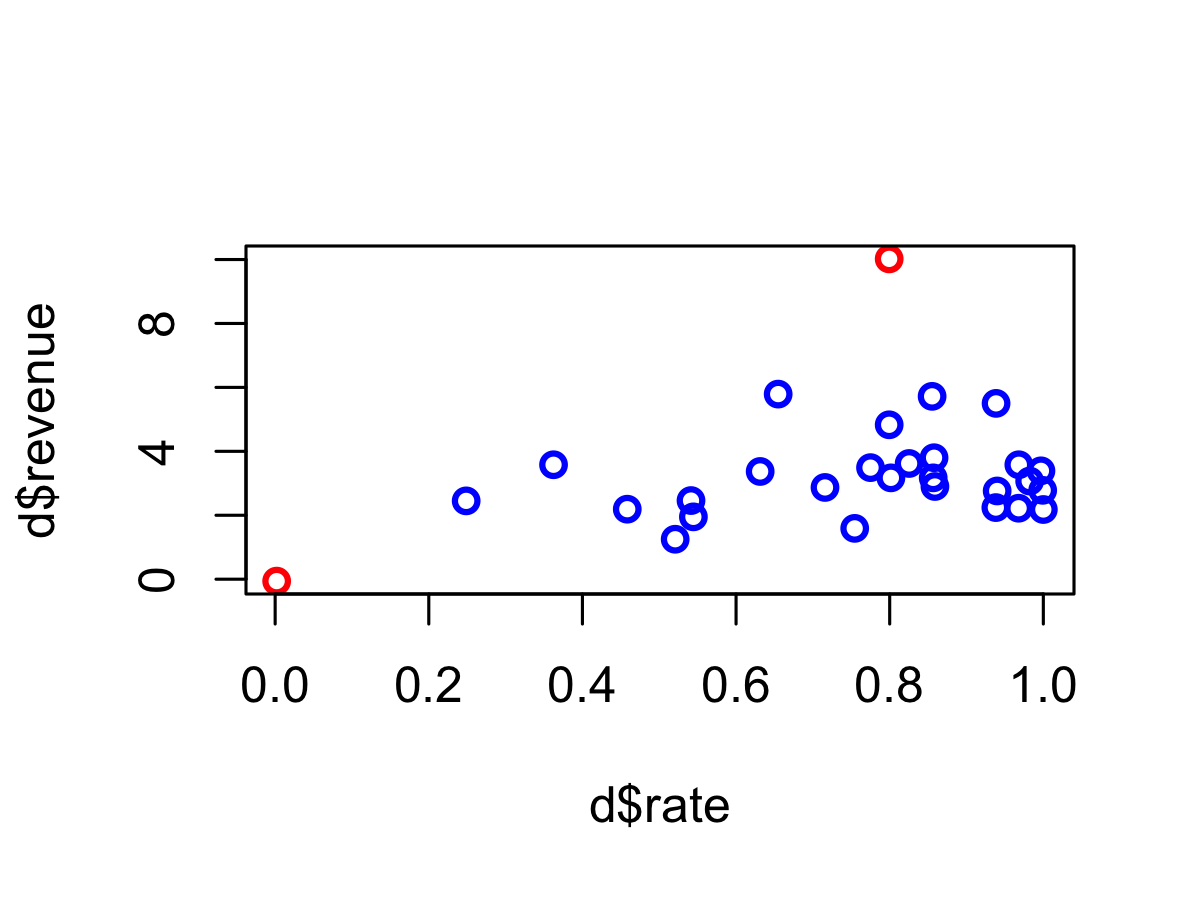

In [269]:
plot(d$revenue ~ d$rate ,
     col=ifelse(PSIS_quad$k>=1, 'red', 'blue') , lwd=2,
     )

Changing revenues from gaussian to student's t-distributed

In [270]:
m.line.T <- quap( alist( revenue ~ dstudent(1.5, mu , sigma ), 
                              mu <- a + Brate*rate ,
                              a ~ dnorm( 0 , 100 ) ,
                              Brate ~ dnorm( 0.5 , 1 ),
                              sigma ~ dexp( 1 ) ) , data = d )

In [271]:
m.quad.T <- quap( alist( revenue ~ dstudent(1.5, mu , sigma ) , 
                              mu <- a + Brate*rate + B2rate*rate^2 ,
                              a ~ dnorm( 0 , 100 ) ,
                              Brate ~ dnorm( 0, 10 ), B2rate ~ dnorm( 0, 10 ),
                              sigma ~ dexp( 1 ) ) , data = d )

In [272]:
m.cubic.T <- quap( alist( revenue ~ dstudent(1.5, mu , sigma ) , 
                              mu <- a + Brate*rate + B2rate*rate^3 + B2rate*rate^3 ,
                              a ~ dnorm( 0 , 100 ) ,
                              Brate ~ dnorm( 5, 10 ), B2rate ~ dnorm( -5, 10 ),
                              B3rate ~ dnorm( 5, 10 ), sigma ~ dexp( 1 ) ) , data = d )

In [273]:
compare( m.quad, m.quad.T)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m.quad.T,105.6123,13.61971,0.00000,NA,3.981181,0.9999465536
m.quad,125.2858,25.68557,19.67356,18.41511,7.953813,0.0000534464


No more problems with PSIS-k

In [275]:
compare( m.quad, m.quad.T, func='PSIS')

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m.quad.T,106.0657,13.80702,0.00000,NA,4.24452,9.999981e-01
m.quad,132.3979,32.43819,26.33216,24.33996,11.43673,1.914446e-06


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



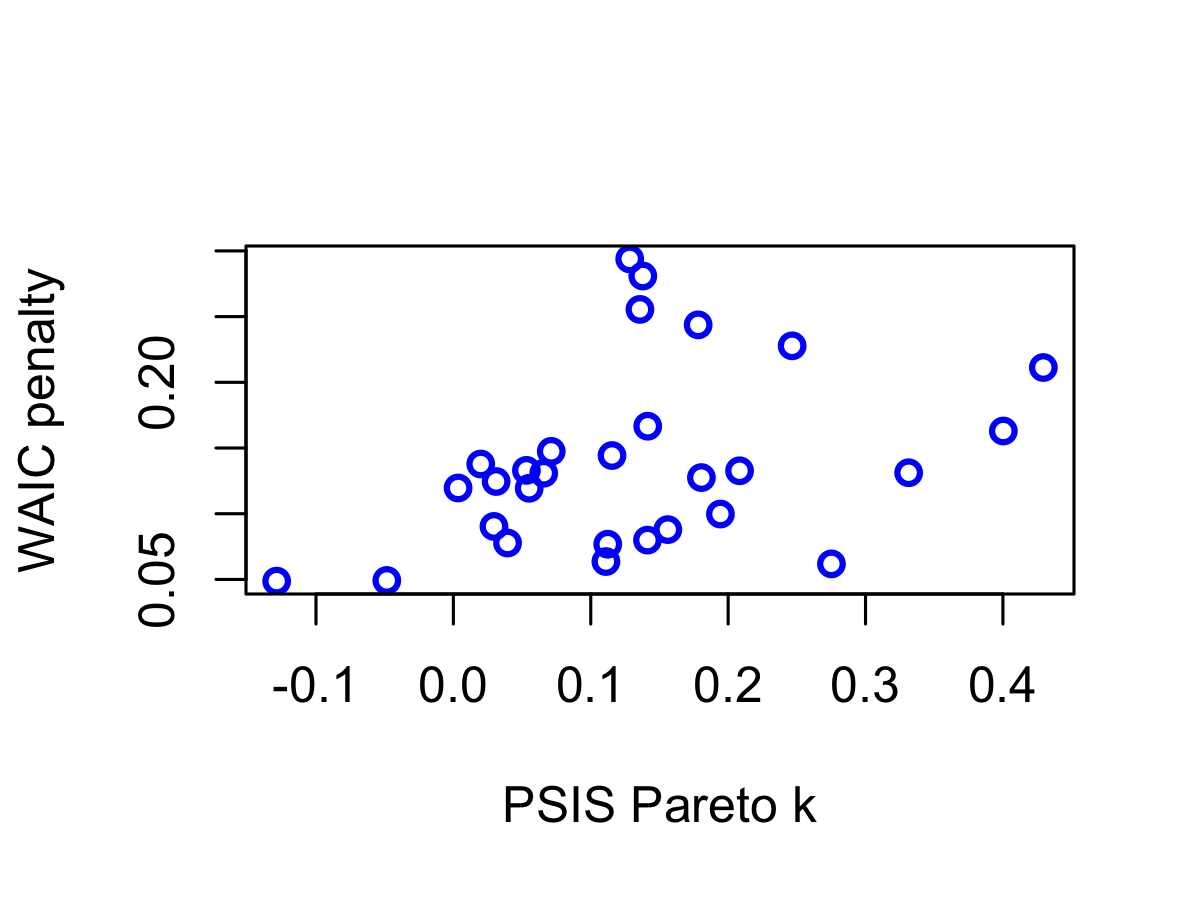

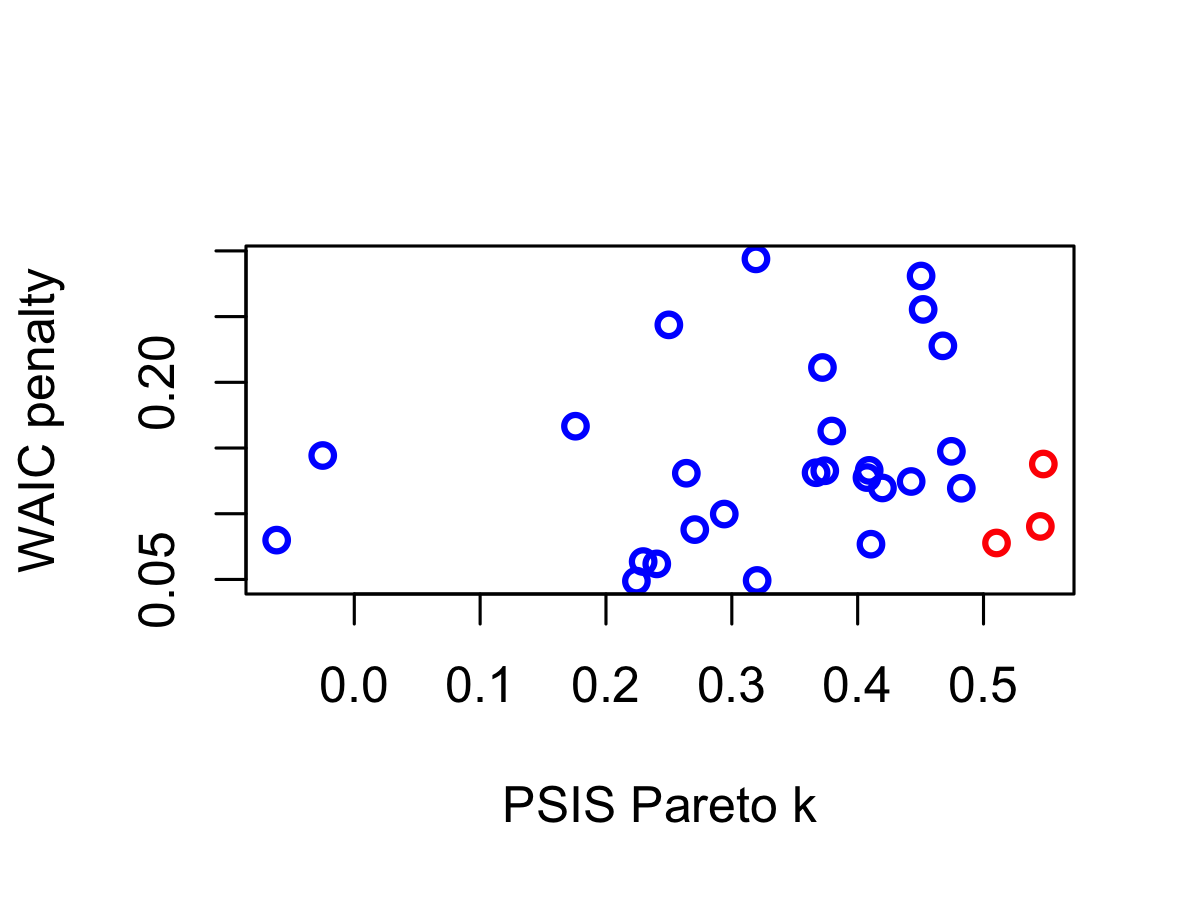

In [276]:
#plot problematic points for t-distributed revenues
set.seed(2)
PSIS_line.T <- PSIS(m.line.T, pointwise=TRUE)
PSIS_quad.T <- PSIS(m.quad.T, pointwise=TRUE)
PSIS_cubic.T <- PSIS(m.cubic.T, pointwise=TRUE)
set.seed(2)
WAIC_line.T <- WAIC(m.line.T, pointwise=TRUE)
WAIC_quad.T <- WAIC(m.quad.T, pointwise=TRUE)
WAIC_cubic.T <- WAIC(m.cubic.T, pointwise=TRUE)

options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

plot( PSIS_quad.T$k , WAIC_quad.T$penalty , 
      xlab="PSIS Pareto k", ylab="WAIC penalty", 
      col=ifelse(PSIS_quad.T$k>=1, 'red', 'blue') , lwd=2 )
plot( PSIS_line.T$k , WAIC_quad.T$penalty , 
      xlab="PSIS Pareto k", ylab="WAIC penalty", 
      col=ifelse(PSIS_line.T$k>=.5, 'red', 'blue') , lwd=2 )


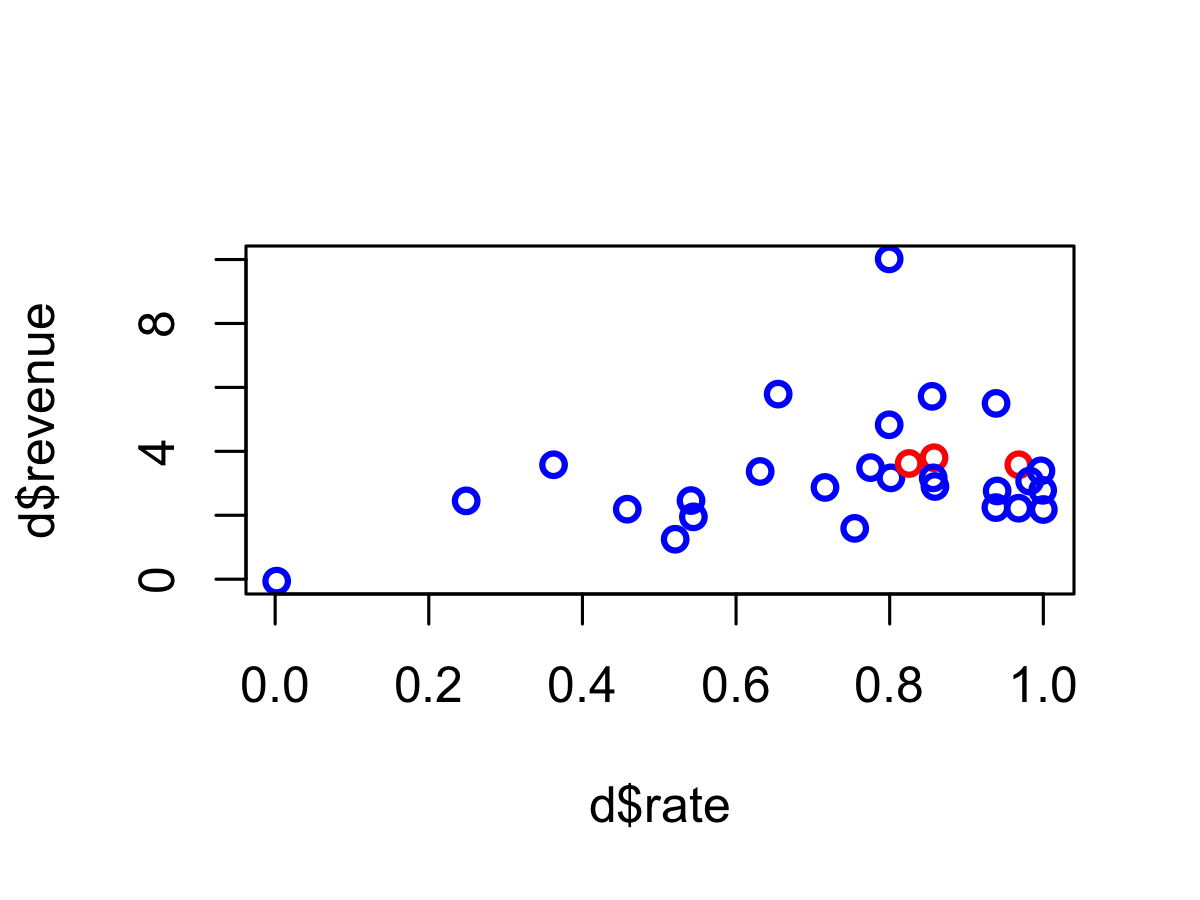

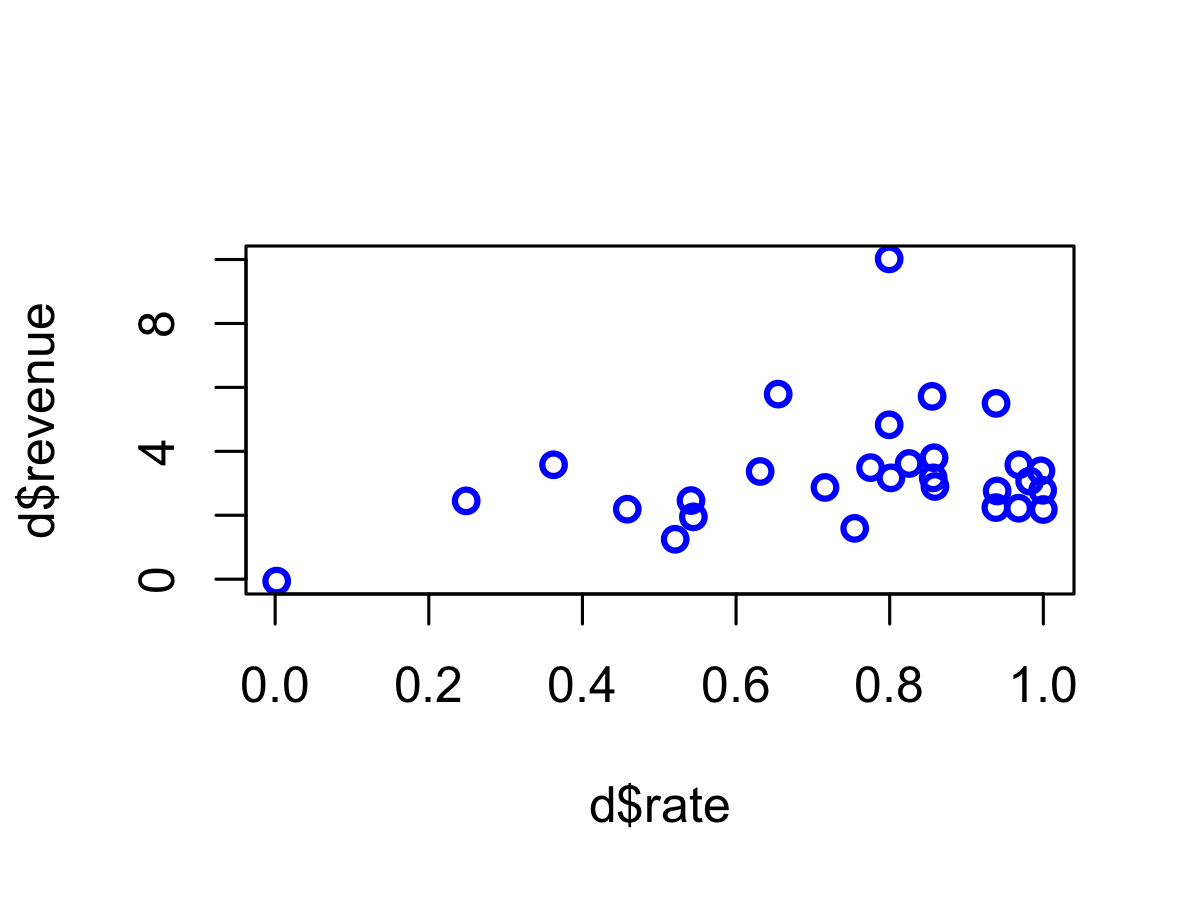

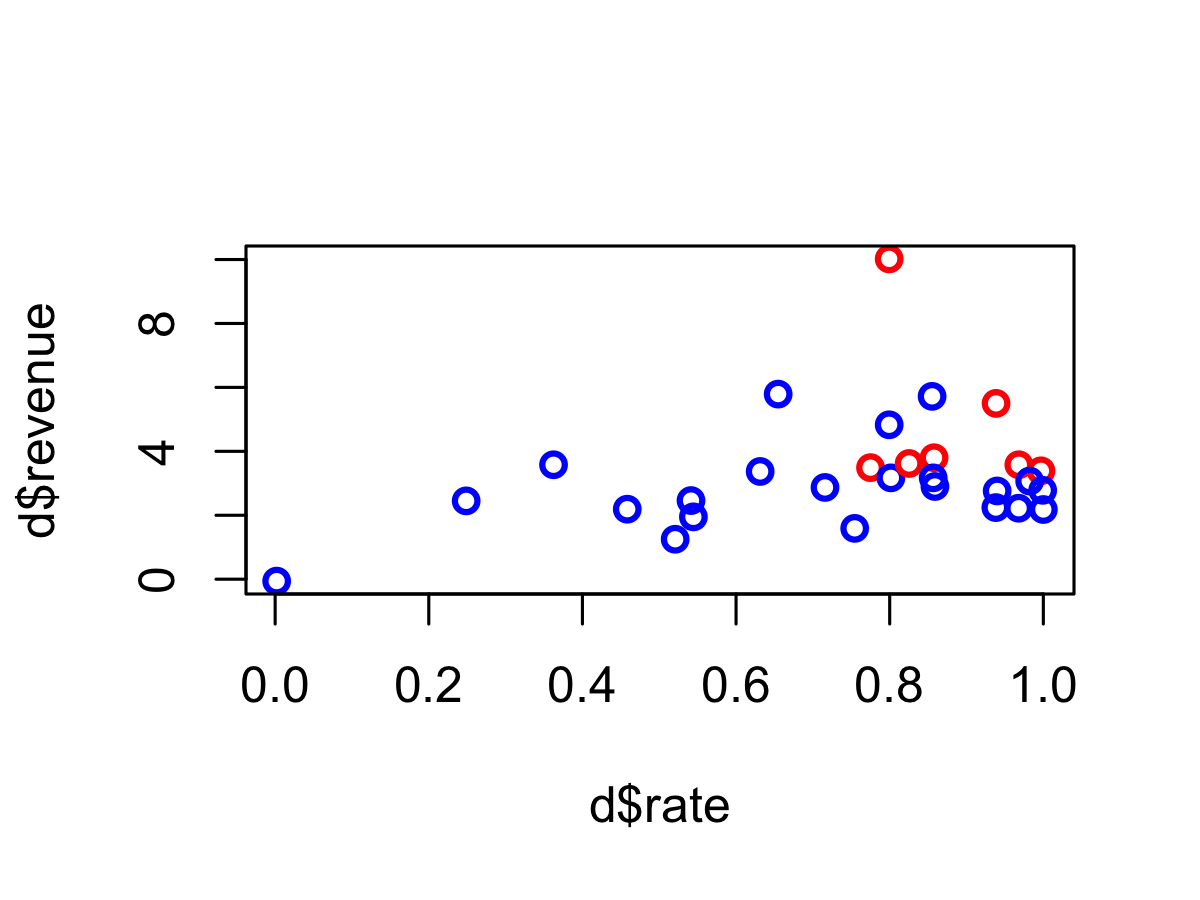

In [277]:
#problematic datapoints for the student's distributed revenues
plot(d$revenue ~ d$rate ,
     col=ifelse(PSIS_line.T$k>=.5, 'red', 'blue') , lwd=2,
     )
plot(d$revenue ~ d$rate ,
     col=ifelse(PSIS_quad.T$k>=.5, 'red', 'blue') , lwd=2,
     )
plot(d$revenue ~ d$rate ,
     col=ifelse(PSIS_cubic.T$k>=.5, 'red', 'blue') , lwd=2,
     )

**t-distributed and gaussian quadratic Model**

In [278]:
rate.seq <- seq( from=0 , to=1 , length.out=30 )
pred_dat <- list( rate=rate.seq ) 
mu <- link( m.quad.T , data=pred_dat )
mu.mean <- apply( mu , 2 , mean )
mu.PI <- apply( mu , 2 , PI , prob=0.89 )

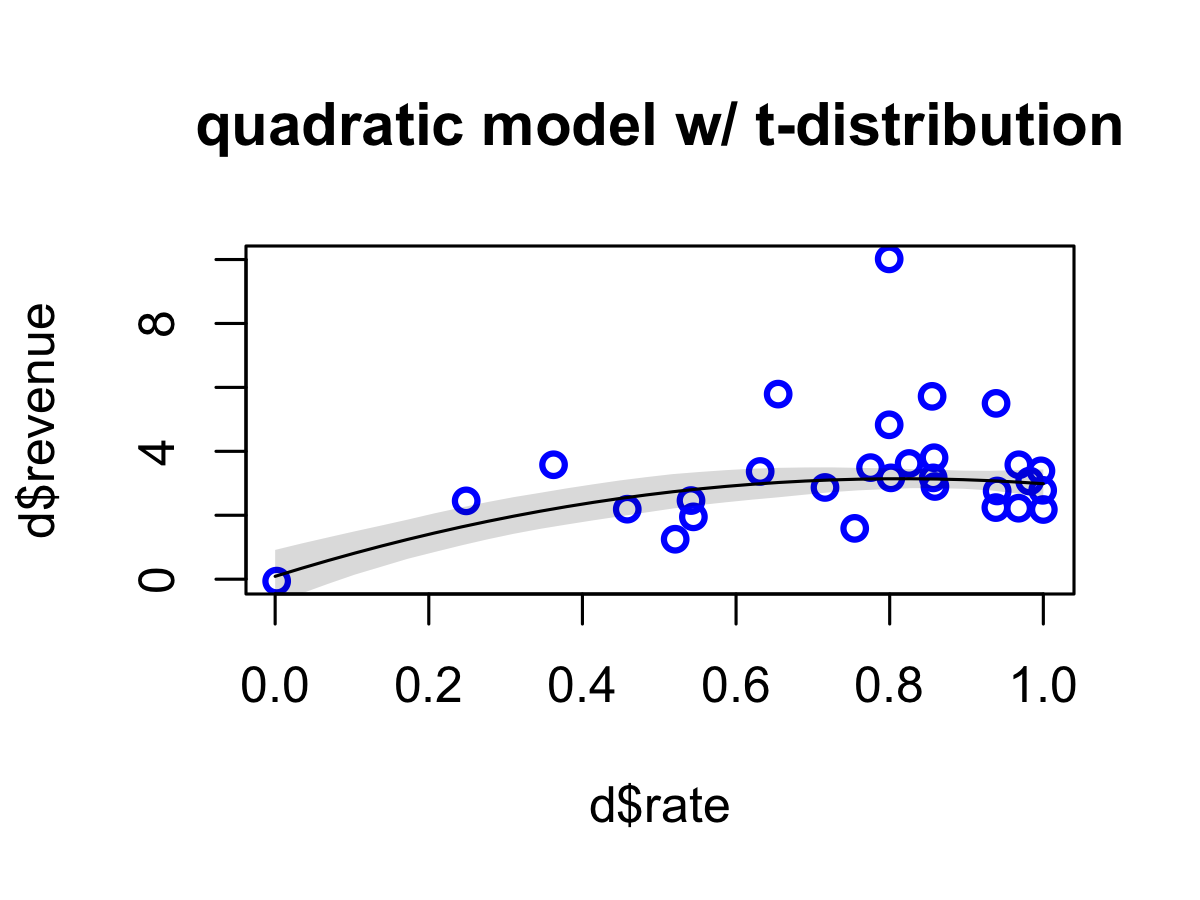

In [279]:
plot( d$revenue ~ d$rate , d , col=ifelse(PSIS_quad.T$k>=.5, 'red', 'blue') , lwd=2,
    main='quadratic model w/ t-distribution') 
lines( rate.seq , mu.mean )
shade( mu.PI , rate.seq )

In [280]:
rate.seq <- seq( from=0 , to=1 , length.out=30 )
pred_dat <- list( rate=rate.seq ) 
mu <- link( m.quad , data=pred_dat )
mu.mean <- apply( mu , 2 , mean )
mu.PI <- apply( mu , 2 , PI , prob=0.89 )

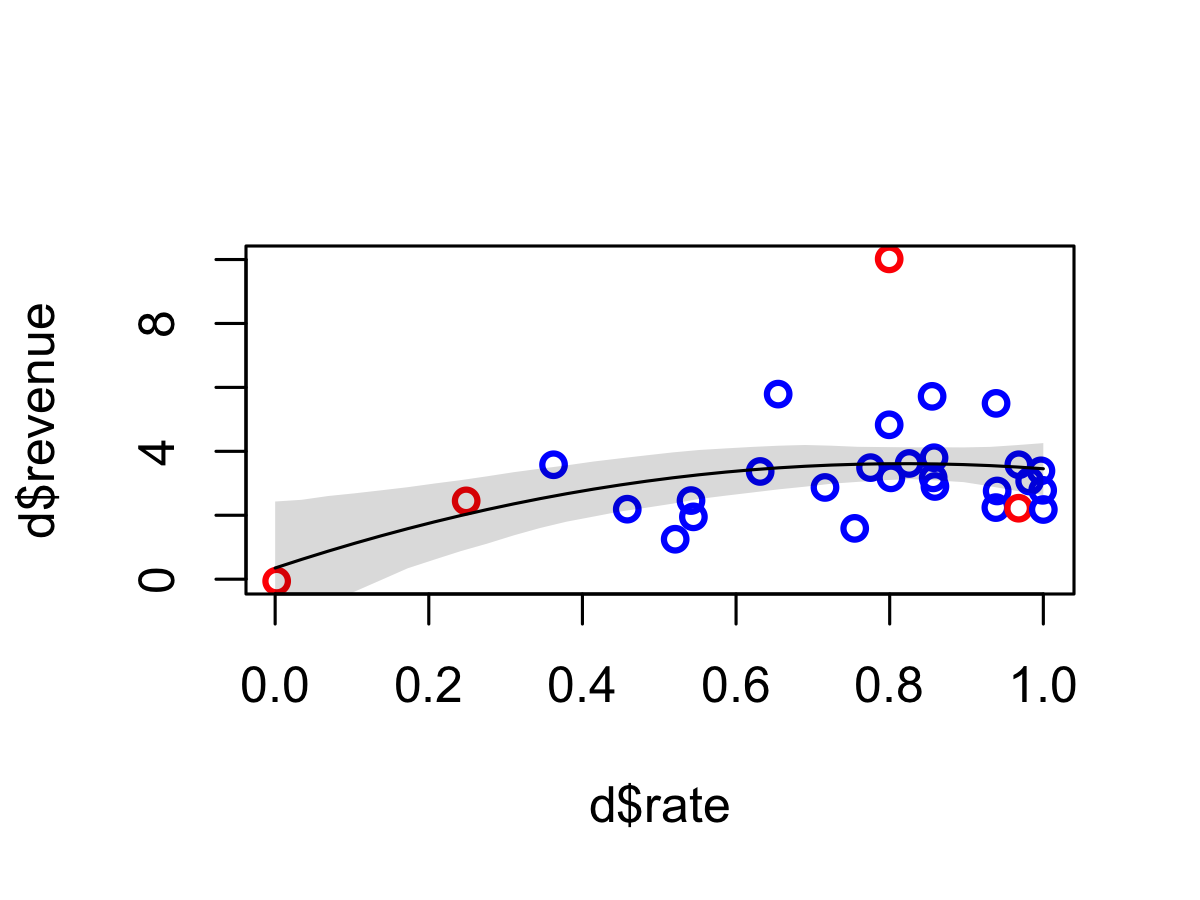

In [281]:
plot( d$revenue ~ d$rate , d , col=ifelse(PSIS_quad$k>=.5, 'red', 'blue') , lwd=2 ) 
lines( rate.seq , mu.mean )
shade( mu.PI , rate.seq )

The most problematic point in the gaussian model had 60 times the penalty of the t-distributed one

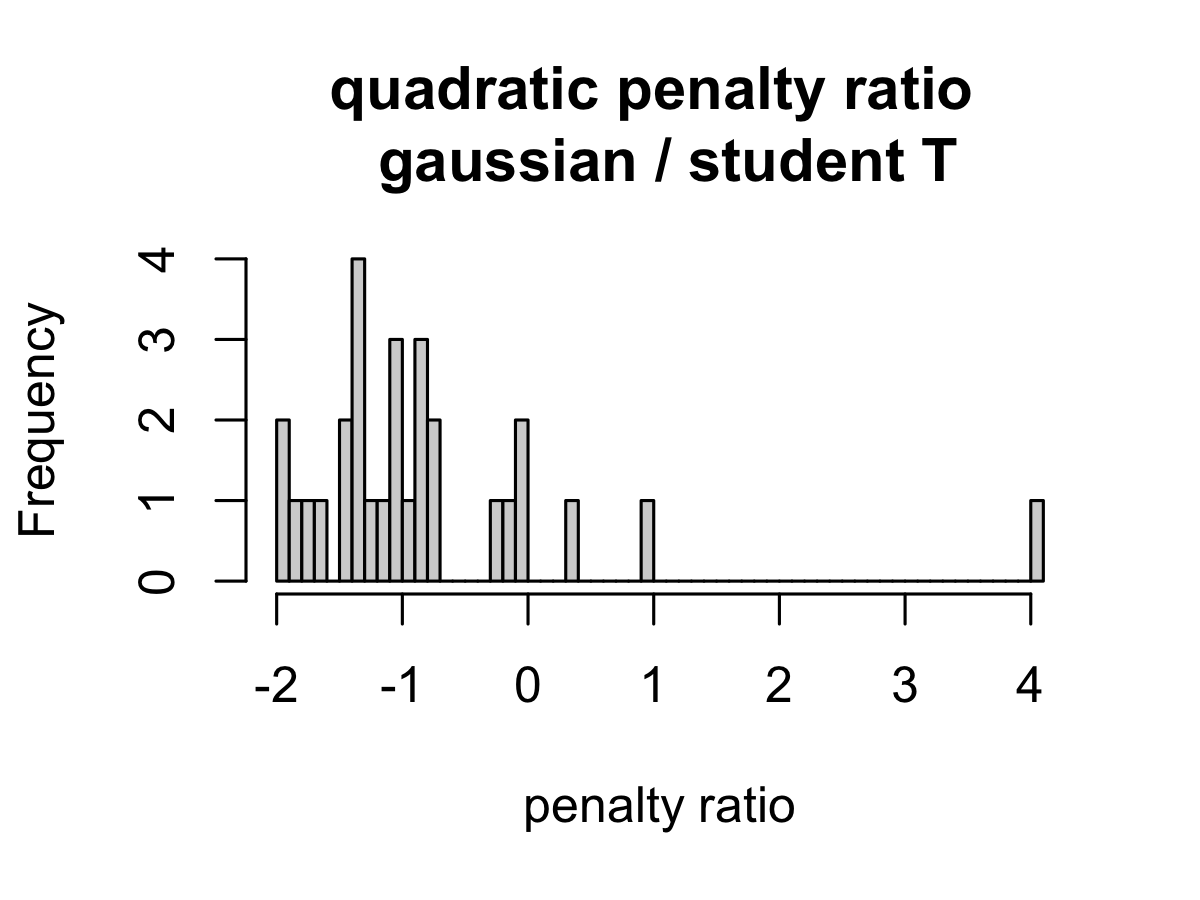

In [282]:
hist(log(PSIS_quad$penalty/PSIS_quad.T$penalty), 
     xlab='penalty ratio', 
     main = "quadratic penalty ratio \n gaussian / student T", breaks=50)

Curves depend a lot on outliers - obviously more and more by increasing their degree, or number of parameters

In [283]:
rate.seq <- seq( from=0 , to=1 , length.out=30 )
pred_dat <- list( rate=rate.seq ) 
mu <- link( m.cubic , data=pred_dat )
mu.mean <- apply( mu , 2 , mean )
mu.PI <- apply( mu , 2 , PI , prob=0.89 )

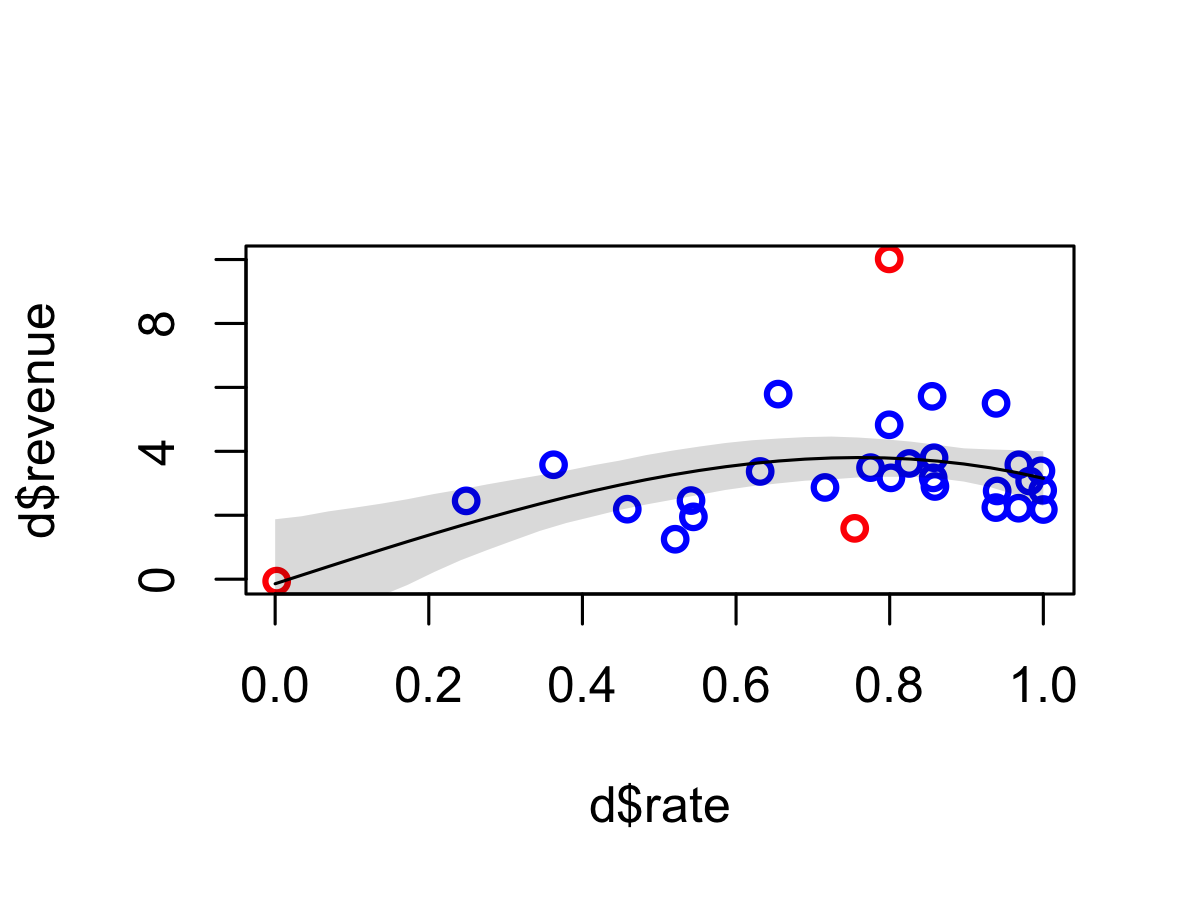

In [284]:
plot( d$revenue ~ d$rate , d , col=ifelse(PSIS_cubic$k>=.5, 'red', 'blue') , lwd=2 ) 
lines( rate.seq , mu.mean )
shade( mu.PI , rate.seq )